<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

In [1]:
%load_ext lab_black

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The mayor of Naperville would like to improve the quality of education that the city's school offers. They would like to know how they currently compare to the rest of the nation, and what can be done to improve their metrics. The ACT and SAT are two standardized national tests used to indicate a student's performance. I will attempt to identify correlating factors to high ACT/SAT scores to give the Mayor an idea of how to shape education policy. Additionally, it is widely believed that a school's performance is related to its funding. Because simply giving the schools more money may not be an option to the mayor, I will try to draw relationships between test scores and income, as increasing the potency of the local economy may both indirectly increase school performance *and* sit well with the voters.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from students' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

The United States government maintains an accurate measure of the country's population, as well as the magnitude of local economies. The Bureau of Economic Analysis ([BEA](https://www.bea.gov/about/who-we-are)) makes all of this information public. Two relevant pieces of information the BEA grants is the population of each state as well as that state's income per capita. Income per capita is defined as the region's total income divided by its total population (note that this includes non-working adults and children). This metric can be used as an indicator of the quality of life of the people who live there ([*source*](https://www.investopedia.com/terms/i/income-per-capita.asp)).

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

* act_\<year>.csv: ACT data by state for years 2017-2022. Years 2017-2019 provided. ([*2020 source*](https://www.act.org/content/dam/act/unsecured/documents/2020/2020-Average-ACT-Scores-by-State.pdf)), ([*2021 source*](https://www.act.org/content/dam/act/unsecured/documents/2021/2021-Average-ACT-Scores-by-State.pdf)), ([*2022 source*](https://www.act.org/content/dam/act/unsecured/documents/2022/2022-Average-ACT-Scores-by-State.pdf))
* sat_\<year>.csv: SAT data by state for years 2017-2022. Years 2017-2019 provided. ([*2020 source*](https://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf)), ([*2021 source*](https://www.number2.com/average-sat-score/)), ([*2022 source*](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent))
* us_income.csv: Total income, income per capita, and population by state and region for years 1929-2021. ([*source*](https://apps.bea.gov/iTable/?reqid=70&step=1&acrdn=2#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyNCwyOSwyNSwzMSwyNiwyNywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCI2MDAiXSxbIkNsYXNzaWZpY2F0aW9uIiwiTm9uLUluZHVzdHJ5Il0sWyJNYWpvcl9BcmVhIiwiMCJdLFsiU3RhdGUiLFsiMCJdXSxbIkFyZWEiLFsiMDAwMDAiXV0sWyJTdGF0aXN0aWMiLFsiLTEiXV0sWyJVbml0X29mX21lYXN1cmUiLCJMZXZlbHMiXSxbIlllYXIiLFsiLTEiXV0sWyJZZWFyQmVnaW4iLCItMSJdLFsiWWVhcl9FbmQiLCItMSJdXX0=))
* naperville.csv: SAT data for the two high schools present in Naperville, years 2019, 2021, and 2022. Compiled from several documents. ([*source*](https://www.isbe.net/ilreportcarddata))

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

In 2015, the state of Illinois elected to switch from the ACT to the SAT as its preferred performance test ([*source*](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)). This decision would stop providing free ACT testing to high schoolers and start providing them with free SAT tests.

School performance is highly impacted by the amount of funding they receive ([*source*](https://www.edweek.org/policy-politics/student-outcomes-does-more-money-really-matter/2019/06)). How much of an impact said funding makes depends on how it is spent, as instances where "politicians and taxpayers invested more money in teacher salaries, school construction, and schools with high populations of low-income students and saw students’ test scores jump." Additionally, schools are now held more accountable for how funding is spent than historically, and thus increases in funding are now more likely spent in ways that benefit students.

Medical students with higher qualities of life perform better academically ([*source*](https://bmcmededuc.biomedcentral.com/articles/10.1186/s12909-015-0476-1)). Areas with higher qualities of life thus see higher performance from their students.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
test_list = [1, 2, 3, 4, 5]


def mean(data):
    return sum(data) / len(data)


mean(test_list)

3.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def std(data):
    mu = mean(data)
    mu2 = mean([d**2 for d in data])
    sigma = (mu2 - mu**2) ** 0.5

    return sigma


std(test_list)

1.4142135623730951

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [4]:
def clean_percent(percentage):
    return float(percentage.strip("%")) / 100.0


clean_percent("50%")

0.5

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [5]:
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from pathlib import Path
from IPython.display import Image
from sklearn.linear_model import LinearRegression

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [6]:
datasets = [
    "act_2017.csv",
    "act_2018.csv",
    "act_2019.csv",
    "act_2020.csv",
    "act_2021.csv",
    "act_2022.csv",
    "sat_2017.csv",
    "sat_2018.csv",
    "sat_2019.csv",
    "sat_2020.csv",
    "sat_2021.csv",
    "sat_2022.csv",
]

dfs = [pd.read_csv(f"../data/{csv}") for csv in datasets]

In [7]:
files_and_dataframes = list(
    zip(datasets, dfs)
)  # zip dataframes and names for easy iteration

for ds, df in files_and_dataframes:
    print(ds)
    print(df.head(5))
    print()

act_2017.csv
      State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0
1   Alabama          100%     18.9  18.4     19.7     19.4      19.2
2    Alaska           65%     18.7  19.8     20.4     19.9      19.8
3   Arizona           62%     18.6  19.8     20.1     19.8      19.7
4  Arkansas          100%     18.9  19.0     19.7     19.5      19.4

act_2018.csv
        State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7

act_2019.csv
        State Participation  Composite
0     Alabama          100%       18.9
1      Alaska           38%       20.1
2     Arizona           73%       19.0
3    Arkansas          100%       19.3
4  California           23%       22.6

act_2020.csv
         State  Participation  Composite
0      Alabama        

In [8]:
def is_number(string):
    try:
        # clean_percent succeeds if the substring is a number
        clean_percent(string)
        return True
    except AttributeError:
        # clean_percent fails because the input was aleady a number
        return True
    except ValueError:
        # clean_percent fails because the substring is not a number
        return False

In [9]:
def data_integrity():
    # check if any duplicate values are present in the dataframes
    no_duplicates = True
    for ds, df in files_and_dataframes:
        duplicates_present = df.duplicated()
        if np.any(duplicates_present):
            no_duplicates = False
            print(f"Duplicate rows found in file {ds}, cleaning required")
            for n, is_duplicate in enumerate(duplicates_present):
                if is_duplicate:
                    state = df["State"].iloc[n]
                    print(f"Duplicate row found at index {n} ({state})")
    if no_duplicates:
        print("No duplicate rows found in any dataframe")

    # check if any null values are present in the dataframes
    all_clean = True
    for ds, df in files_and_dataframes:
        null_values = pd.isna(df).values
        if np.any(null_values):
            print(f"Null values found in file {ds}, cleaning required")
            for n, line in enumerate(null_values):
                if np.any(line):
                    state = df["State"].iloc[n]
                    print(f"Null value found at index {n} ({state})")
            all_clean = False
    if all_clean:
        print("No null values found in any dataframe")

    # check if any non-numerical but not null values are present in dataframes
    no_strange = True
    for ds, df in files_and_dataframes:
        proto_numerics = df.iloc[:, 1:]
        strange_values = np.logical_not(proto_numerics.applymap(is_number).values)
        if np.any(strange_values):
            print(f"Strange values found in file {ds}, cleaning required")
            for n, line in enumerate(strange_values):
                if np.any(line):
                    state = df["State"].iloc[n]
                    print(f"Strange value found at index {n} ({state})")
            no_strange = False

    if no_strange:
        print("No strange values found in any dataframe")


data_integrity()

Duplicate rows found in file act_2018.csv, cleaning required
Duplicate row found at index 20 (Maine)
Null values found in file sat_2021.csv, cleaning required
Null value found at index 39 (Puerto Rico)
Null value found at index 47 (Virgin Islands)
Strange values found in file act_2017.csv, cleaning required
Strange value found at index 51 (Wyoming)
Strange values found in file sat_2019.csv, cleaning required
Strange value found at index 39 (Puerto Rico)
Strange value found at index 47 (Virgin Islands)
Strange values found in file sat_2022.csv, cleaning required
Strange value found at index 39 (Puerto Rico)
Strange value found at index 48 (Virgin Islands, US)


The above tests tell us there are some missing values in `sat_2021.csv`, as well are some values which will cause errors in later calculations in three other files. Quick inspection of the `act_2017.csv` file shows a typo (or perhaps a strange EOF delimiter) where the letter 'x' was inserted at the very end for a value of '20.2x'. For this file, we will simply strip off the 'x' and process the dataframe normally.

For the three SAT files, we elect to drop the erroneous rows, as Puerto Rico and the Virgin Islands test performances is not especially relevant to this analysis.

Additionally, there is a duplicate row present in `act_2018.csv`. This row will be dropped. Also in this file, we notice that 'District of Columbia' has its 'C' in the lower case. This will be altered for proper merging.

In [10]:
dfs[0] = dfs[0].replace("20.2x", 20.2)
dfs[0]["Composite"] = pd.to_numeric(dfs[0]["Composite"])
dfs[1] = dfs[1].drop_duplicates()
dfs[1] = dfs[1].replace("District of columbia", "District of Columbia")
dfs[8] = dfs[8].drop(labels=[39, 47])
dfs[10] = dfs[10].drop(labels=[39, 47])
dfs[11] = dfs[11].drop(labels=[39, 48])

# re-zip our names and dfs for continued use
files_and_dataframes = list(zip(datasets, dfs))

data_integrity()

No duplicate rows found in any dataframe
No null values found in any dataframe
No strange values found in any dataframe


In [11]:
def test_act_score(data):
    # check if act scores are in the valid range
    validity = (1 <= data) & (data <= 36)
    error_index = np.where(validity == False)
    return error_index[0]  # only the first entry in the where tuple is needed


def test_sat_subject(data):
    # test if sat scores are in the valid range
    validity = (200 <= data) & (data <= 800)
    error_index = np.where(validity == False)
    return error_index[0]


def test_sat_total(data):
    # test if sat total scores are in the valid range
    validity = (400 <= data) & (data <= 1600)
    error_index = np.where(validity == False)
    return error_index[0]


def test_percent(data):
    # test if a converted percentage is in the valid range
    validity = (0.0 <= data) & (data <= 1.0)
    error_index = np.where(validity == False)
    return error_index[0]

In [12]:
def data_validity():
    # big function to check validity of all data
    all_valid = True
    for ds, df in files_and_dataframes:
        errors = []
        state_col = df["State"]
        try:
            participation_col = df["Participation"]
        except KeyError:
            participation_col = df["Participation Rate"]

        # check sat values
        if "sat" in ds:
            total_col = df["Total"]
            try:
                subject_cols = [df["Math"], df["Evidence-Based Reading and Writing"]]
            except KeyError:
                subject_cols = [df["Math"], df["EBRW"]]
            if "2020" in ds:
                # the 2020 column is stored as an integer
                percent_errors = test_percent(participation_col / 100.0)
            elif "2021" in ds:
                # 2021 is formatted correctly
                percent_errors = test_percent(participation_col)
            else:
                # all other files have percent signs
                percent_errors = test_percent(
                    np.array([clean_percent(p) for p in participation_col])
                )
            subject_errors = [test_sat_subject(score) for score in subject_cols]
            total_errors = test_sat_total(total_col)

            # check for bad percents
            for pe in percent_errors:
                print(
                    f"Invalid percent encountered at index {pe} in {ds} dataframe ({state_col.iloc[pe]})"
                )
                all_valid = False
            # check for bad subject scores
            for subject_error in subject_errors:
                for se in subject_error:
                    print(
                        f"Invalid test score encountered at index {se} in {ds} dataframe ({state_col.iloc[se]})"
                    )
                    all_valid = False
            # check for bad total scores
            for te in total_errors:
                print(
                    f"Invalid test score total encountered at index {te} in {ds} dataframe ({state_col.iloc[te]})"
                )
                all_valid = False

        # check act values
        if "act" in ds:
            composite_col = df["Composite"]
            score_cols = [df[col] for col in df.columns[2:]]

            if any([year in ds for year in ["2020", "2021", "2022"]]):
                # these years stored percent as integers
                percent_errors = test_percent(participation_col / 100.0)
            else:
                # others stored with percent signs
                percent_errors = test_percent(
                    np.array([clean_percent(p) for p in participation_col])
                )

            score_errors = [test_act_score(score) for score in score_cols]

            # check for bad percents
            for pe in percent_errors:
                print(
                    f"Invalid percent encountered at index {pe} in {ds} dataframe ({state_col.iloc[pe]})"
                )
                all_valid = False
            # check for bad scores
            for score_error in score_errors:
                for se in score_error:
                    print(
                        f"Invalid test score encountered at index {se} in {ds} dataframe ({state_col.iloc[se]})"
                    )
                    all_valid = False

    if all_valid:
        print("No invalid points found in any dataframe")


data_validity()

Invalid test score encountered at index 20 in sat_2017.csv dataframe (Maryland)


We see that there is a single erroneous test score in `sat_2017.csv`. Upon inspection, we see that said score has a value of 52 in the Math column, which is below the minimum possible score of 200. However, we also see that the values in the Evidence-Based Reading and Writing and Total columns are valid and intact at 536 and 1060, respectively. With that evidence, we can infer that the value in the Math column was mistakenly truncated and its proper value should be 524.

In [13]:
dfs[6] = dfs[6].replace(to_replace=52, value=524)

files_and_dataframes = list(zip(datasets, dfs))

data_validity()

No invalid points found in any dataframe


In [14]:
# rename columns to consistent names
modified_dfs = []
for ds, df in files_and_dataframes:
    rename_map = {}
    col_prefix = ds.split(".")[0]
    for col in df.columns:
        if col == "Evidence-Based Reading and Writing" or col == "EBRW":
            col_suffix = "ebrw"
        elif col == "Participation" or col == "Participation Rate":
            col_suffix = "participation"
        else:
            col_suffix = col.lower()
        if col != "State":
            new_name = "_".join([col_prefix, col_suffix])
        else:
            new_name = col_suffix
        rename_map[col] = new_name

    modified_dfs.append(df.rename(columns=rename_map))

In [15]:
# in this cell, we actually change the percents
# within the dataframes to be valid

# strip percent signs and convert to floats
modified_dfs[0]["act_2017_participation"] = [
    clean_percent(p) for p in modified_dfs[0]["act_2017_participation"]
]
modified_dfs[1]["act_2018_participation"] = [
    clean_percent(p) for p in modified_dfs[1]["act_2018_participation"]
]
modified_dfs[2]["act_2019_participation"] = [
    clean_percent(p) for p in modified_dfs[2]["act_2019_participation"]
]
modified_dfs[6]["sat_2017_participation"] = [
    clean_percent(p) for p in modified_dfs[6]["sat_2017_participation"]
]
modified_dfs[7]["sat_2018_participation"] = [
    clean_percent(p) for p in modified_dfs[7]["sat_2018_participation"]
]
modified_dfs[8]["sat_2019_participation"] = [
    clean_percent(p) for p in modified_dfs[8]["sat_2019_participation"]
]
modified_dfs[11]["sat_2022_participation"] = [
    clean_percent(p) for p in modified_dfs[11]["sat_2022_participation"]
]


# convert to floats
modified_dfs[3]["act_2020_participation"] = (
    modified_dfs[3]["act_2020_participation"] / 100.0
)
modified_dfs[4]["act_2021_participation"] = (
    modified_dfs[4]["act_2021_participation"] / 100.0
)
modified_dfs[5]["act_2022_participation"] = (
    modified_dfs[5]["act_2022_participation"] / 100.0
)
modified_dfs[9]["sat_2020_participation"] = (
    modified_dfs[9]["sat_2020_participation"] / 100.0
)

In [16]:
# merge tests into relative dataframes
act_df = modified_dfs[0]
for i in range(1, 6):
    act_df = pd.merge(act_df, modified_dfs[i], how="inner", on="state")
sat_df = modified_dfs[6]
for i in range(7, 12):
    sat_df = pd.merge(sat_df, modified_dfs[i], how="inner", on="state")

act_df.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,act_2018_participation,act_2018_composite,act_2019_participation,act_2019_composite,act_2020_participation,act_2020_composite,act_2021_participation,act_2021_composite,act_2022_participation,act_2022_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,0.617255,21.496078,0.586667,21.464706,0.569020,21.505882,0.44549,22.007843,0.460196,21.572549
std,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,0.340371,2.111583,0.345159,2.194523,0.356428,2.398450,0.36945,2.910591,0.381479,2.914384
min,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.070000,17.700000,0.060000,17.900000,0.050000,17.900000,0.02000,17.800000,0.020000,17.300000
25%,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,0.285000,19.950000,0.245000,19.800000,0.215000,19.550000,0.09000,19.750000,0.090000,19.100000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.660000,21.300000,0.540000,21.100000,0.460000,20.900000,0.30000,20.700000,0.300000,20.500000
75%,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,1.000000,23.650000,1.000000,23.700000,1.000000,23.700000,0.85500,25.100000,0.920000,24.550000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,25.600000,1.000000,25.500000,1.000000,26.000000,1.00000,27.600000,1.000000,26.900000


Here, we notice that in 2017, one state averaged a 2.3 on the science portion of the act. This is likely an error. Inspection of the data shows it to be Maryland. We substitute in a proper value taken from https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf.

In [17]:
maryland_index = act_df[act_df["state"] == "Maryland"].index[0]
act_df.at[maryland_index, "act_2017_science"] = 23.2
act_df.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,act_2018_participation,act_2018_composite,act_2019_participation,act_2019_composite,act_2020_participation,act_2020_composite,act_2021_participation,act_2021_composite,act_2022_participation,act_2022_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.617255,21.496078,0.586667,21.464706,0.569020,21.505882,0.44549,22.007843,0.460196,21.572549
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.340371,2.111583,0.345159,2.194523,0.356428,2.398450,0.36945,2.910591,0.381479,2.914384
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.070000,17.700000,0.060000,17.900000,0.050000,17.900000,0.02000,17.800000,0.020000,17.300000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.285000,19.950000,0.245000,19.800000,0.215000,19.550000,0.09000,19.750000,0.090000,19.100000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.660000,21.300000,0.540000,21.100000,0.460000,20.900000,0.30000,20.700000,0.300000,20.500000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,1.000000,23.650000,1.000000,23.700000,1.000000,23.700000,0.85500,25.100000,0.920000,24.550000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,25.600000,1.000000,25.500000,1.000000,26.000000,1.00000,27.600000,1.000000,26.900000


In [18]:
sat_df.describe()

,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total,sat_2019_participation,sat_2019_ebrw,...,sat_2020_total,sat_2020_participation,sat_2021_participation,sat_2021_ebrw,sat_2021_math,sat_2021_total,sat_2022_participation,sat_2022_ebrw,sat_2022_math,sat_2022_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.457451,563.686275,556.235294,1120.019608,0.490588,560.803922,...,1100.352941,0.487059,0.487059,554.901961,545.549020,1100.352941,0.377843,559.705882,547.039216,1104.509804
std,0.352766,45.666901,47.121395,92.494812,0.373143,47.502627,47.772623,94.155083,0.387476,46.248035,...,89.244344,0.389262,0.389262,42.780488,46.898321,89.244344,0.340707,46.492276,48.133963,94.194771
min,0.020000,482.000000,468.000000,950.000000,0.020000,480.000000,480.000000,977.000000,0.020000,483.000000,...,936.000000,0.020000,0.020000,480.000000,456.000000,936.000000,0.010000,449.000000,456.000000,938.000000
25%,0.040000,533.500000,523.500000,1055.500000,0.045000,534.500000,522.500000,1057.500000,0.055000,527.500000,...,1027.500000,0.045000,0.045000,523.000000,505.000000,1027.500000,0.030000,527.000000,504.500000,1027.000000
50%,0.380000,559.000000,548.000000,1107.000000,0.520000,552.000000,544.000000,1098.000000,0.540000,550.000000,...,1095.000000,0.510000,0.510000,549.000000,543.000000,1095.000000,0.310000,560.000000,545.000000,1096.000000
75%,0.660000,613.000000,599.000000,1212.000000,0.775000,610.500000,593.500000,1204.000000,0.820000,612.000000,...,1185.500000,0.850000,0.850000,599.500000,586.000000,1185.500000,0.610000,607.000000,591.500000,1198.000000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,643.000000,655.000000,1298.000000,1.000000,636.000000,...,1257.000000,1.000000,1.000000,624.000000,633.000000,1257.000000,1.000000,627.000000,629.000000,1252.000000


In [19]:
def simple_projector(x, y, p):
    # takes two 1-d data vectors x and y
    # fits a simple linear regression
    # outputs a prediction for point x = p
    lr = LinearRegression().fit(x, y)

    return lr.predict(p)


# load in income data for cleaning
income_dataset = "../data/us_income.csv"
relevant_years = ["2017", "2018", "2019", "2020", "2021"]  # 2022 data not available
income_df = pd.read_csv(income_dataset)
# select "income per capita" rows
income_df = income_df[(income_df["LineCode"] == 3)][
    ["GeoName"] + relevant_years
].reset_index(drop=True)
to_drop = [
    "New England",
    "Mideast",
    "Great Lakes",
    "Plains",
    "Southeast",
    "Southwest",
    "Rocky Mountain",
    "Far West",
]
# drop rows corresponding to US regions
# and drop columns with null values
income_df = income_df[~income_df["GeoName"].isin(to_drop)].dropna()
income_df["GeoName"] = income_df["GeoName"].str.strip(" *")

income_col_names = [
    "state",
    "income_2017",
    "income_2018",
    "income_2019",
    "income_2020",
    "income_2021",
]
# rename columns
income_df = income_df.rename(
    columns={col: income_col_names[n] for n, col in enumerate(income_df.columns)}
)

# 2022 data is unavailable
# so we use a linear estimator
# to approximate the 2022 income
proj_2022_income = []
x = np.array(range(2017, 2022)).reshape((-1, 1))
for index, row in income_df.iterrows():
    state = row[0]
    y = row[1:].values.reshape((-1, 1))
    proj = simple_projector(x, y, np.array([[2022]]))
    proj_2022_income.append(round(proj[0, 0], 0))

income_df["income_2022_projected"] = proj_2022_income

income_df["state"] = income_df["state"].str.replace("United States", "National")

income_df.describe()

,income_2017,income_2018,income_2019,income_2020,income_2021,income_2022_projected
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.00000
mean,50264.057692,52367.750000,54754.153846,58123.750000,62154.211538,64393.75000
std,8308.350192,8644.308679,8936.751262,9252.961429,9922.323588,10208.33962
min,36902.000000,37900.000000,39445.000000,42716.000000,45881.000000,47401.00000
25%,44807.000000,46745.000000,48747.000000,52191.250000,55960.750000,58216.00000
50%,48906.500000,51214.000000,53484.500000,56149.000000,60072.000000,62044.00000
75%,54419.250000,56559.000000,58675.500000,62201.750000,66286.250000,68378.00000
max,79984.000000,82708.000000,84671.000000,89735.000000,96477.000000,98719.00000


In [20]:
# load in population data for cleaning
population_dataset = "../data/us_income.csv"
relevant_years = ["2017", "2018", "2019", "2020", "2021"]  # 2022 data not available
population_df = pd.read_csv(population_dataset)
# select population rows
population_df = population_df[(population_df["LineCode"] == 2)][
    ["GeoName"] + relevant_years
].reset_index(drop=True)

# drop rows corresponding to US regions
# and drop columns with null values
population_df = population_df[~population_df["GeoName"].isin(to_drop)].dropna()
population_df["GeoName"] = population_df["GeoName"].str.strip(" *")

population_col_names = [
    "state",
    "population_2017",
    "population_2018",
    "population_2019",
    "population_2020",
    "population_2021",
]
# rename population columns
population_df = population_df.rename(
    columns={
        col: population_col_names[n] for n, col in enumerate(population_df.columns)
    }
)

proj_2022_population = []
x = np.array(range(2017, 2022)).reshape((-1, 1))
for index, row in population_df.iterrows():
    state = row[0]
    y = row[1:].values.reshape((-1, 1))
    proj = simple_projector(x, y, np.array([[2022]]))
    proj_2022_population.append(round(proj[0, 0], 0))

population_df["population_2022_projected"] = proj_2022_population

# 2022 data is unavailable
# so we use a linear estimator
# to approximate the 2022 population
population_df["state"] = population_df["state"].str.replace("United States", "National")
population_df.loc[0, "population_2017":"population_2022_projected"] = np.mean(
    np.array(
        population_df[population_col_names[1:] + ["population_2022_projected"]].values
    ),
    axis=0,
)

# cast columns to integers
for col in population_df.columns:
    if col != "state":
        population_df[col] = population_df[col].astype(int)

population_df

,state,population_2017,population_2018,population_2019,population_2020,population_2021,population_2022_projected
0,National,12562425,12636236,12701273,12750041,12765144,12838796
1,Alabama,4952202,4976395,5003418,5024803,5039877,5066466
2,Alaska,741949,737717,734823,732441,732673,728772
3,Arizona,6879830,6969944,7070511,7177986,7276316,7375222
4,Arkansas,2990801,2997271,3004248,3012232,3025891,3031631
5,California,39424071,39535906,39547996,39499738,39237836,39326518
6,Colorado,5600169,5677250,5735934,5784308,5812069,5881203
7,Connecticut,3607615,3611318,3607159,3600260,3605597,3601862
8,Delaware,961499,971072,981297,991886,1003384,1013203
9,District of Columbia,680945,685632,687408,690093,670050,677627


In [21]:
# calculate weighted national statistics

# for this section I assumed that each
# state had an equal portion of their
# population as students
act_national = pd.DataFrame({"state": "National"}, index=[51])
for col, values in act_df.items():
    if col != "state":
        words = col.split("_")
        test = words[0]
        year = words[1]
        aspect = words[2]
        pop_feature = (
            f"population_{year}" if year != "2022" else f"population_{year}_projected"
        )
        pop = np.array(population_df[pop_feature][1:])  # cast to array to drop index
        if aspect == "participation":
            # weighted participation uses only
            # population as weights
            act_national[f"{test}_{year}_{aspect}"] = round(
                (values * pop).sum() / pop.sum(), 2
            )
        else:
            # other aspects approximate the numer of students
            # as population * participation
            # actual portion of students divides out
            # if the portion is assumed to be constant
            participation = act_df[f"{test}_{year}_participation"]
            act_national[f"{test}_{year}_{aspect}"] = round(
                (values * pop * participation).sum() / (pop * participation).sum(), 1
            )


act_df = pd.concat([act_df, act_national])

# same thing, but for SAT data
sat_national = pd.DataFrame({"state": "National"}, index=[51])
for col, values in sat_df.items():
    if col != "state":
        words = col.split("_")
        test = words[0]
        year = words[1]
        aspect = words[2]
        pop_feature = (
            f"population_{year}" if year != "2022" else f"population_{year}_projected"
        )
        pop = population_df[pop_feature][1:]

        if aspect == "participation":
            sat_national[f"{test}_{year}_{aspect}"] = round(
                (values * pop).sum() / pop.sum(), 2
            )
        else:
            participation = sat_df[f"{test}_{year}_participation"]
            sat_national[f"{test}_{year}_{aspect}"] = round(
                (values * pop * participation).sum() / (pop * participation).sum(), 1
            )

sat_df = pd.concat([sat_df, sat_national])

In [22]:
# read in napervilles data
naperville_df_raw = pd.read_csv("../data/naperville.csv")

# separate into 2 dataframes
# one for each high school
naperville_df_1 = naperville_df_raw[
    naperville_df_raw["school"] == "Naperville Central High School"
].reset_index(drop=True)
naperville_df_2 = naperville_df_raw[
    naperville_df_raw["school"] == "Naperville North High School"
].reset_index(drop=True)

naperville_df = pd.DataFrame(
    columns=["year", "sat_participation", "sat_math", "sat_ebrw", "sat_total"]
)

naperville_df["year"] = naperville_df_1["year"]

# calculate weighted average values
average_ebrw_participation = (
    naperville_df_1["sat_ebrw_participation"]
    * naperville_df_1["sat_ebrw_number_of_students"]
    + naperville_df_2["sat_ebrw_participation"]
    * naperville_df_2["sat_ebrw_number_of_students"]
) / (
    naperville_df_1["sat_ebrw_number_of_students"]
    + naperville_df_2["sat_ebrw_number_of_students"]
)
average_math_participation = (
    naperville_df_1["sat_math_participation"]
    * naperville_df_1["sat_math_number_of_students"]
    + naperville_df_2["sat_math_participation"]
    * naperville_df_2["sat_math_number_of_students"]
) / (
    naperville_df_1["sat_math_number_of_students"]
    + naperville_df_2["sat_math_number_of_students"]
)

# average between both dataframes
# and convert to percentage float
naperville_df["sat_participation"] = (
    (average_ebrw_participation + average_math_participation) / 200.0
).round(0)

average_ebrw_score = (
    naperville_df_1["sat_ebrw_score"] * naperville_df_1["sat_ebrw_number_of_students"]
    + naperville_df_2["sat_ebrw_score"] * naperville_df_2["sat_ebrw_number_of_students"]
) / (
    naperville_df_1["sat_ebrw_number_of_students"]
    + naperville_df_2["sat_ebrw_number_of_students"]
)
average_math_score = (
    naperville_df_1["sat_math_score"] * naperville_df_1["sat_math_number_of_students"]
    + naperville_df_2["sat_math_score"] * naperville_df_2["sat_math_number_of_students"]
) / (
    naperville_df_1["sat_math_number_of_students"]
    + naperville_df_2["sat_math_number_of_students"]
)

# set data values in clean dataframe
naperville_df["sat_ebrw"] = average_ebrw_score.round(0)
naperville_df["sat_math"] = average_math_score.round(0)
naperville_df["sat_total"] = naperville_df["sat_math"] + naperville_df["sat_ebrw"]
naperville_df.to_csv("../data/cleaned_naperville_data.csv", index=False)
naperville_df

,year,sat_participation,sat_math,sat_ebrw,sat_total
0,2019,1.0,590.0,575.0,1165.0
1,2021,1.0,574.0,572.0,1146.0
2,2022,1.0,565.0,567.0,1132.0


In [23]:
full_df = act_df.copy()  # create a base dataframe for merging

# merge dataframes
for data_f in [sat_df, income_df, population_df]:
    full_df = pd.merge(full_df, data_f, how="inner", on="state")

full_df.to_csv("../data/cleaned_data_full.csv", index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

### Main Dataframe (full_df)
This dataframe contains all data from the ACT, SAT, and income `.csv` files after it has been cleaned and formatted. It contains data for all 50 US states, plus the District of Columbia and a national weighted average. The bulk of the analysis will be on data contained in this dataframe. This dataframe is stored in `full_df`, and has a variant called `no_national_df` which is identical sans the national point.

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**state**|*object*|ACT, SAT, Income|The US state the test results are associated with, including District of Columbia.|
|**act_2017_english**|*float*|act_2017|The average score of all students on the English portion of the ACT in a given state in 2017. Individual scores range 1-36, rounded to the nearest integer.|
|**act_2017_math**|*float*|act_2017|The average score of all students on the math portion of the ACT in a given state in 2017. Individual scores range 1-36, rounded to the nearest integer.|
|**act_2017_reading**|*float*|act_2017|The average score of all students on the reading portion of the ACT in a given state in 2017. Individual scores range 1-36, rounded to the nearest integer.|
|**act_2017_science**|*float*|act_2017|The average score of all students on the science portion of the ACT in a given state in 2017. Individual scores range 1-36, rounded to the nearest integer.|
|**act_20XX_participation**|*float*|ACT|The fraction of students who participated in the ACT. Years 2017-2022.|
|**act_20XX_composite**|*float*|ACT|The average composite score of all students, taken as the average of their scores on the four subject tests. Individual scores range 1-36, rounded to the nearest integer. Years 2017-2022.|
|**sat_20XX_participation**|*float*|sat_2017|The fraction of students who participated in the SAT. Years 2017-2022.|
|**sat_20XX_ebrw**|*int*|SAT|The average score of all students on the evidence-based reading and writing portion of the SAT. Individual scores range 200-800, rounded to the nearest integer. Years 2017-2022.|
|**sat_20XX_math**|*int*|SAT|The average score of all students on the math portion of the SAT. Individual scores range 200-800, rounded to the nearest integer. Years 2017-2022.|
|**sat_20XX_total**|*int*|SAT|The average combined score of all students, calculated as the sum of EBRW and math scores. Individual scores range 400-1600, rounded to the nearest integer. Years 2017-2022.|
|**income_20YY**|*float*|Income|Income per capita, defined as total income for the state divided by its population. Years 2017-2021.|
|**income_2022_projected**|*float*|None|Estimated income per capita for the year 2022.|
|**population_20YY**|*int*|Income|Number of people living in each US state. Note: The "National" population here refers to average population per state, not total population. Years 2017-2021.|
|**population_2022_projected**|*int*|None|Estimated population for the year 2022.|

### Descriptive Satistics Dataframe (descriptive_df)
This dataframe contains descriptive statistics for all of the features contained in `full_df`.

|Feature|Type|Description|
|:---|:---|:---|
|**feature**|*object*|The feature from `full_df` to which the descriptive statistics apply (numeric features only).|
|**mean**|*float*|The unweighted average of the feature.|
|**median**|*float*|The median of the feature.|
|**std**|*float*|The standard deviation of the feature.|
|**minimum**|*float*|The minimum value of the feature.|
|**minimum_states**|*float*|The states which correspond to the minimum value of the feature.|
|**maximum**|*float*|The maximum value of the feature.|
|**maximum_states**|*float*|The states which correspond to the minimum value of the feature.|
|**25%**|*float*|The value of the 25th percentile, which is the value for which 25% of the feature points have a value less than or equal to this number.|
|**50%**|*int*|The value of the 50th percentile.|
|**75%**|*int*|The value of the 75th percentile.|

### Local Dataframe (naperville_df)
This dataframe contains values relevant to the analysis for my local city, Naperville. This dataframe is small, as most publicly available data for my city was not related to any other quantities present.

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**year**|*int*|Naperville|The year the exam was taken. Values 2019, 2021, and 2022.|
|**sat_participation**|*float*|Naperville|The fraction of students who participated in the SAT.|
|**sat_math**|*int*|Naperville|The average score of all students on the math portion of the SAT.|
|**sat_ebrw**|*int*|Naperville|The average score of all students on the evidence-based reading and writing portion of the SAT.|
|**sat_total**|*int*|Naperville|The average combined score of all students.|



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for each test per year?
        - Which states have the highest and lowest mean total/composite scores for each test per year?
        - Which states are improving over time? Which states are getting worse?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - How does Illinois compare to the rest of the nation in terms of ACT scores, SAT scores, and income per capita?
        - Which ACT subject test correlates most strongly with composite score? Is it significant compared to other subjects?
        - Which SAT subject score is greater on average? Which is greater in Illinois? In Naperville?
        - How do the poorest states perform? The richest?
        - Is the average income per capita growing or shrinking for the nation? What is it projected to be in 2022 for the nation and for Illinois?
        - How strongly are test scores and income correlated? Which test score is correlated more strongly?
        - Do rich states favor the ACT or SAT? What about poorer states?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [24]:
# descriptive statistics are stored as a dataframe for easy access during further analysis
descriptive_df = pd.DataFrame(
    columns=[
        "mean",
        "median",
        "std",
        "minimum",
        "minimum_states",
        "maximum",
        "maximum_states",
        "25%",
        "50%",
        "75%",
    ]
)

states = full_df["state"].values
for col, values in full_df.items():
    if col != "state":
        sigma = values.std()
        mu = values.mean()
        me = values.median()
        minimum = values.min()
        minimum_states = states[np.where(values == minimum)]
        maximum = values.max()
        maximum_states = states[np.where(values == maximum)]
        percentile_25 = values.quantile(0.25)
        percentile_50 = values.quantile(0.5)
        percentile_75 = values.quantile(0.75)

        row = [
            mu,
            me,
            sigma,
            minimum,
            ", ".join(minimum_states),
            maximum,
            ", ".join(maximum_states),
            percentile_25,
            percentile_50,
            percentile_75,
        ]

        descriptive_df.loc[col] = row

descriptive_df = descriptive_df.reset_index().rename(columns={"index": "feature"})
descriptive_df

,feature,mean,median,std,minimum,minimum_states,maximum,maximum_states,25%,50%,75%
0,act_2017_participation,6.511538e-01,0.680,3.184007e-01,0.08,Maine,1.0,"Alabama, Arkansas, Colorado, Kentucky, Louisia...",3.100000e-01,0.680,1.000000e+00
1,act_2017_english,2.091923e+01,20.550,2.332132e+00,16.30,Nevada,25.5,Connecticut,1.900000e+01,20.550,2.330000e+01
2,act_2017_math,2.117308e+01,20.900,1.963602e+00,18.00,Nevada,25.3,Massachusetts,1.940000e+01,20.900,2.310000e+01
3,act_2017_reading,2.200385e+01,21.700,2.048142e+00,18.10,Nevada,26.0,New Hampshire,2.047500e+01,21.700,2.412500e+01
4,act_2017_science,2.144038e+01,21.300,1.723910e+00,18.20,Nevada,24.9,New Hampshire,1.997500e+01,21.300,2.320000e+01
5,act_2017_composite,2.150962e+01,21.400,2.002083e+00,17.80,Nevada,25.5,New Hampshire,1.980000e+01,21.400,2.360000e+01
6,act_2018_participation,6.157692e-01,0.655,3.371876e-01,0.07,Maine,1.0,"Alabama, Arkansas, Kentucky, Louisiana, Missis...",2.925000e-01,0.655,1.000000e+00
7,act_2018_composite,2.148269e+01,21.050,2.093006e+00,17.70,Nevada,25.6,Connecticut,1.997500e+01,21.050,2.362500e+01
8,act_2019_participation,5.850000e-01,0.520,3.419695e-01,0.06,Maine,1.0,"Alabama, Arkansas, Kentucky, Louisiana, Missis...",2.475000e-01,0.520,1.000000e+00
9,act_2019_composite,2.145000e+01,20.950,2.175487e+00,17.90,Nevada,25.5,"Connecticut, Massachusetts",1.980000e+01,20.950,2.365000e+01


In [25]:
# dictionary of standard deviations
sd = {col: std(full_df[col]) for col in full_df.columns if col != "state"}
sd

{'act_2017_participation': 0.31532433757929745,
 'act_2017_english': 2.3095985716419034,
 'act_2017_math': 1.9446292295028251,
 'act_2017_reading': 2.0283530206380305,
 'act_2017_science': 1.7072537118678195,
 'act_2017_composite': 1.9827389384951584,
 'act_2018_participation': 0.3339296687457393,
 'act_2018_composite': 2.072783445760265,
 'act_2019_participation': 0.3386653669468296,
 'act_2019_composite': 2.1544676301191243,
 'act_2020_participation': 0.34977100496919405,
 'act_2020_composite': 2.355162402219547,
 'act_2021_participation': 0.36251275227518576,
 'act_2021_composite': 2.863690128810401,
 'act_2022_participation': 0.3743236010245995,
 'act_2022_composite': 2.868137552097429,
 'sat_2017_participation': 0.3460076614399569,
 'sat_2017_ebrw': 44.95463109901535,
 'sat_2017_math': 46.376270935869286,
 'sat_2017_total': 91.04530577356695,
 'sat_2018_participation': 0.3659236914016285,
 'sat_2018_ebrw': 46.807980333795754,
 'sat_2018_math': 47.091368447396775,
 'sat_2018_total'

In [26]:
# Which states have the highest and lowest participation rates for each test per year?


def format_with_and(word_list):
    # turns a list of words into a sentence-like string
    # where the last two items are separated by the word 'and'
    num_words = len(word_list)
    if num_words == 2:
        formatted = " and ".join(word_list)
    elif num_words > 2:
        word_list[-1] = "and " + word_list[-1]
        formatted = ", ".join(word_list)
    else:
        raise ValueError(f"Too few words in word_list: {num_words}")

    return formatted


for index, row in descriptive_df.iterrows():
    feature = row["feature"]
    words = feature.split("_")
    is_participation = "participation" in words
    year = words[1]
    if is_participation:
        test = words[0]

        # get best and worst values from descriptive_df
        worst_participation = row["minimum"]
        worst_participation_states = row["minimum_states"]
        worst_list = worst_participation_states.split(", ")
        num_worst = len(worst_list)

        best_participation = row["maximum"]
        best_participation_states = row["maximum_states"]
        best_list = best_participation_states.split(", ")
        num_best = len(best_list)

        # format statistics into readable format
        if num_worst > 1:
            worst_str = format_with_and(worst_list)
            print(
                f"In {year}, the states with the lowest participation rates for the {test.upper()} were {worst_str}, with a participation rate of {int(100 * worst_participation)}%"
            )
        else:
            worst_str = worst_list[0]
            print(
                f"In {year}, the state with the lowest participation rates for the {test.upper()} was {worst_str}, with a participation rate of {int(100 * worst_participation)}%"
            )
        print()
        if num_best > 1:
            best_str = format_with_and(best_list)
            print(
                f"In {year}, the states with the highest participation rates for the {test.upper()} were {best_str}, with a participation rate of {int(100 * best_participation)}%"
            )
        else:
            best_str = best_list[0]
            print(
                f"In {year}, the state with the highest participation rates for the {test.upper()} was {best_str}, with a participation rate of {int(100 * best_participation)}%"
            )
        print()

In 2017, the state with the lowest participation rates for the ACT was Maine, with a participation rate of 8%

In 2017, the states with the highest participation rates for the ACT were Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, and Wyoming, with a participation rate of 100%

In 2018, the state with the lowest participation rates for the ACT was Maine, with a participation rate of 7%

In 2018, the states with the highest participation rates for the ACT were Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, and Wyoming, with a participation rate of 100%

In 2019, the state with the lowest participation rates for the ACT was Maine, with a participation rate of 6%

In 2019, the states with the highest participation rates for the ACT were Alabama, Ark

The above output is fairly self-descriptive, however I will point out that the states for the highest and lowest participation rates do not change much year to year. For the highest rates this likely represents states with mandated and provided testing. The consistency of the lower rate states is harder to explain and outside the scope of this analysis. Notably, Illinois is present only in the highest SAT rates of 2019. This is likely the result of Illinois switching from the ACT to the SAT in 2015-2016, though why it took so long to reach the highest participation rates may be something to investigate in a secondary analysis. Its absence from highest participating states from 2020+ is most likely due to the COVID-19 pandemic. 

In [27]:
# Which states have the highest and lowest mean total/composite scores for each test per year?

for index, row in descriptive_df.iterrows():
    feature = row["feature"]
    words = feature.split("_")
    is_total = "total" in words or "composite" in words
    year = words[1]
    if is_total:
        test = words[0]

        # get best and worst values from descriptive_df
        worst_total = row["minimum"]
        worst_total_states = row["minimum_states"]
        worst_list = worst_total_states.split(", ")
        num_worst = len(worst_list)

        best_total = row["maximum"]
        best_total_states = row["maximum_states"]
        best_list = best_total_states.split(", ")
        num_best = len(best_list)

        # format outputs
        if num_worst > 1:
            worst_str = format_with_and(worst_list)
            print(
                f"In {year}, the states with the lowest total test scores for the {test.upper()} were {worst_str}, with an average score of {worst_total if test == 'act' else int(worst_total)}"
            )
        else:
            worst_str = worst_list[0]
            print(
                f"In {year}, the state with the lowest total test scores for the {test.upper()} was {worst_str}, with an average score of {worst_total if test == 'act' else int(worst_total)}"
            )
        print()
        if num_best > 1:
            best_str = format_with_and(best_list)
            print(
                f"In {year}, the states with the highest total test scores for the {test.upper()} were {best_str}, with an average score of {worst_total if test == 'act' else int(worst_total)}"
            )
        else:
            best_str = best_list[0]
            print(
                f"In {year}, the state with the highest total test scores for the {test.upper()} was {best_str}, with an average score of {worst_total if test == 'act' else int(worst_total)}"
            )
        print()

In 2017, the state with the lowest total test scores for the ACT was Nevada, with an average score of 17.8

In 2017, the state with the highest total test scores for the ACT was New Hampshire, with an average score of 17.8

In 2018, the state with the lowest total test scores for the ACT was Nevada, with an average score of 17.7

In 2018, the state with the highest total test scores for the ACT was Connecticut, with an average score of 17.7

In 2019, the state with the lowest total test scores for the ACT was Nevada, with an average score of 17.9

In 2019, the states with the highest total test scores for the ACT were Connecticut and Massachusetts, with an average score of 17.9

In 2020, the state with the lowest total test scores for the ACT was Nevada, with an average score of 17.9

In 2020, the state with the highest total test scores for the ACT was Massachusetts, with an average score of 17.9

In 2021, the state with the lowest total test scores for the ACT was Nevada, with an ave

Like the cell above, the best and worse performers are fairly consistent year-to-year. This, when combined with income information, could give some indication of whether local income positively effects test performance. 

In [28]:
# Which states are improving over time? Which states are getting worse?

act_delta_columns = ["state"] + [f"delta_{year}" for year in range(2017, 2022)]
act_deltas_df = pd.DataFrame(columns=act_delta_columns)
act_deltas_df["state"] = full_df["state"]
for year in range(2017, 2022):
    # calculate year by year changes in ACT data
    delta = full_df[f"act_{year + 1}_composite"] - full_df[f"act_{year}_composite"]
    act_deltas_df[f"delta_{year}"] = delta

# calculate total and median shift
act_deltas_df["total_delta"] = act_deltas_df.sum(numeric_only=True, axis=1).round(2)
act_deltas_df["median_delta"] = act_deltas_df.median(numeric_only=True, axis=1).round(2)

sat_delta_columns = ["state"] + [f"delta_{year}" for year in range(2017, 2022)]
sat_deltas_df = pd.DataFrame(columns=act_delta_columns)
sat_deltas_df["state"] = full_df["state"]
for year in range(2017, 2022):
    # calculate year by year changes in SAT data
    delta = full_df[f"sat_{year + 1}_total"] - full_df[f"sat_{year}_total"]
    sat_deltas_df[f"delta_{year}"] = delta

# calculate total and median shift
sat_deltas_df["total_delta"] = sat_deltas_df.sum(numeric_only=True, axis=1).round(2)
sat_deltas_df["median_delta"] = sat_deltas_df.median(numeric_only=True, axis=1).round(2)

# act printouts
print(
    f"As a nation, the total change in ACT score was {act_deltas_df.loc[51, 'total_delta']} since 2017"
)
print()

print(
    f"As a nation, the median change in ACT score was {act_deltas_df.loc[51, 'median_delta']} from 2017-2022"
)
print()

relevant_states = [
    state
    for state in act_deltas_df["state"][act_deltas_df["total_delta"] > 0]
    if state != "National"
]
print(
    f"The following states had a net increase in ACT scores since 2017 ({len(relevant_states)} total):"
)
print(", ".join(relevant_states))
print()

best_act_total_delta = act_deltas_df["total_delta"].max()
best_states = act_deltas_df["state"][
    act_deltas_df["total_delta"] == best_act_total_delta
]

print(
    f"The state with the largest increase in ACT score was {best_states.values[0]} with a net increase of {best_act_total_delta} since 2017"
)
print()

relevant_states = [
    state
    for state in act_deltas_df["state"][act_deltas_df["total_delta"] <= 0]
    if state != "National"
]
print(
    f"The following states had a net decrease or no change in ACT scores since 2017 ({len(relevant_states)} total):"
)
print(", ".join(relevant_states))
print()

worst_act_total_delta = act_deltas_df["total_delta"].min()
worst_states = act_deltas_df["state"][
    act_deltas_df["total_delta"] == worst_act_total_delta
]

print(
    f"The state with the largest decrease in ACT score was {worst_states.values[0]} with a net decrease of {worst_act_total_delta} since 2017"
)
print()

relevant_states = [
    state
    for state in act_deltas_df["state"][act_deltas_df["median_delta"] > 0]
    if state != "National"
]
print(
    f"The following states usually imporved their ACT score year to year since 2017 ({len(relevant_states)} total):"
)
print(", ".join(relevant_states))
print()

best_act_median_delta = act_deltas_df["median_delta"].max()
best_states = act_deltas_df["state"][
    act_deltas_df["median_delta"] == best_act_median_delta
]

print(
    f"The state with the largest median increase in ACT score was {best_states.values[0]} gaining on average {best_act_median_delta} points per year since 2017"
)
print()

relevant_states = [
    state
    for state in act_deltas_df["state"][act_deltas_df["median_delta"] <= 0]
    if state != "National"
]
print(
    f"The following states usually got worse or maintained the same ACT score year to year since 2017 ({len(relevant_states)} total):"
)
print(", ".join(relevant_states))
print()

worst_act_median_delta = act_deltas_df["median_delta"].min()
worst_states = act_deltas_df["state"][
    act_deltas_df["median_delta"] == worst_act_median_delta
]

print(
    f"The state with the largest median decrease in ACT score was {worst_states.values[0]} losing on average {worst_act_median_delta} points per year since 2017"
)
print()

# sat statistic printouts
print(
    f"As a nation, the total change in SAT score was {sat_deltas_df.loc[51, 'total_delta']} since 2017"
)
print()

print(
    f"As a nation, the median change in SAT score was {sat_deltas_df.loc[51, 'median_delta']} from 2017-2022"
)
print()

relevant_states = [
    state
    for state in sat_deltas_df["state"][sat_deltas_df["total_delta"] > 0]
    if state != "National"
]
print(
    f"The following states had a net increase in SAT scores since 2017 ({len(relevant_states)} total):"
)
print(", ".join(relevant_states))
print()

best_sat_total_delta = sat_deltas_df["total_delta"].max()
best_states = sat_deltas_df["state"][
    sat_deltas_df["total_delta"] == best_sat_total_delta
]

print(
    f"The state with the largest increase in SAT score was {best_states.values[0]} with a net increase of {best_sat_total_delta} since 2017"
)
print()

relevant_states = [
    state
    for state in sat_deltas_df["state"][sat_deltas_df["total_delta"] <= 0]
    if state != "National"
]
print(
    f"The following states had a net decrease or no change in SAT scores since 2017 ({len(relevant_states)} total):"
)
print(", ".join(relevant_states))
print()

worst_sat_total_delta = sat_deltas_df["total_delta"].min()
worst_states = sat_deltas_df["state"][
    sat_deltas_df["total_delta"] == worst_sat_total_delta
]

print(
    f"The state with the largest decrease in SAT score was {worst_states.values[0]} with a net decrease of {worst_sat_total_delta} since 2017"
)
print()

relevant_states = [
    state
    for state in sat_deltas_df["state"][sat_deltas_df["median_delta"] > 0]
    if state != "National"
]
print(
    f"The following states usually imporved their SAT score year to year since 2017 ({len(relevant_states)} total):"
)
print(", ".join(relevant_states))
print()

best_sat_median_delta = sat_deltas_df["median_delta"].max()
best_states = sat_deltas_df["state"][
    sat_deltas_df["median_delta"] == best_sat_median_delta
]

print(
    f"The state with the largest median increase in SAT score was {best_states.values[0]} gaining on average {best_sat_median_delta} points per year since 2017"
)
print()

relevant_states = [
    state
    for state in sat_deltas_df["state"][sat_deltas_df["median_delta"] <= 0]
    if state != "National"
]
print(
    f"The following states usually got worse or maintained the same SAT score year to year since 2017 ({len(relevant_states)} total):"
)
print(", ".join(relevant_states))
print()

worst_sat_median_delta = sat_deltas_df["median_delta"].min()
worst_states = sat_deltas_df["state"][
    sat_deltas_df["median_delta"] == worst_sat_median_delta
]

print(
    f"The state with the largest median decrease in SAT score was {worst_states.values[0]} losing on average {worst_sat_median_delta} points per year since 2017"
)
print()

As a nation, the total change in ACT score was -1.2 since 2017

As a nation, the median change in ACT score was -0.25 from 2017-2022

The following states had a net increase in ACT scores since 2017 (26 total):
Alaska, California, Colorado, Connecticut, Delaware, District of Columbia, Georgia, Idaho, Illinois, Indiana, Maine, Maryland, Massachusetts, Michigan, New Hampshire, New Jersey, New Mexico, New York, Oregon, Pennsylvania, Rhode Island, South Carolina, Vermont, Virginia, Washington, West Virginia

The state with the largest increase in ACT score was California with a net increase of 3.7 since 2017

The following states had a net decrease or no change in ACT scores since 2017 (25 total):
Alabama, Arizona, Arkansas, Florida, Hawaii, Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, North Dakota, Ohio, Oklahoma, South Dakota, Tennessee, Texas, Utah, Wisconsin, Wyoming

The state with the largest decrease in ACT score was

There is a great deal of information in the above text. First and foremost, as a nation we are consistently performing worse on both the ACT and SAT. National education policies enacted in the past decade are worth investigating in a secondary study. However, not all states are getting worse, with 26 states improving their ACT score and 18 states improving their SAT score. Illinois had both a positive net gain and positive median gain in ACT scores, while having both a net loss and negative median for SAT scores. This is difficult to explain given the limited data, but I suspect the decrease in SAT scores is once again due to pandemic effects. Since the ACT is no longer mandated in Illinois, less students are likely to take it, and those who elect to take it are probably better prepared than the average student being forced to take the SAT. The fact that Illinois is improving in this statistic may very well be random, but with the data gathered this cannot be verified.

In [29]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# ACT
act_participation_cols = ["state"] + [
    f"act_{year}_participation" for year in range(2017, 2023)
]

act_participation_df = full_df[act_participation_cols]
# get all rows that have at least one max participation
act_max_participation_indices = (act_participation_df == 1).any(axis=1)
act_max_participation_df = act_participation_df[act_max_participation_indices]
# print those rows in the dataframe
act_max_participation_df[(act_max_participation_df.iloc[:, 1:] != 1).any(axis=1)]

,state,act_2017_participation,act_2018_participation,act_2019_participation,act_2020_participation,act_2021_participation,act_2022_participation
3,Arkansas,1.00,1.00,1.00,1.00,0.99,0.93
5,Colorado,1.00,0.30,0.27,0.25,0.16,0.15
17,Kentucky,1.00,1.00,1.00,1.00,1.00,0.96
18,Louisiana,1.00,1.00,1.00,1.00,0.98,1.00
23,Minnesota,1.00,0.99,0.95,0.92,0.60,0.69
25,Missouri,1.00,1.00,0.82,0.78,0.63,0.66
26,Montana,1.00,1.00,1.00,1.00,0.70,0.94
27,Nebraska,0.84,1.00,1.00,1.00,0.86,0.94
33,North Carolina,1.00,1.00,1.00,1.00,0.92,0.88
34,North Dakota,0.98,0.98,0.96,0.94,1.00,0.96


The above table displays all states that had a 100% testing rate at least once on the ACT. Not one of them maintained a perfect testing rate across all six years, but several did pre-2020.

In [30]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# SAT
sat_participation_cols = ["state"] + [
    f"sat_{year}_participation" for year in range(2017, 2023)
]
# same thing for the sat
sat_participation_df = full_df[sat_participation_cols]
sat_max_participation_indices = (sat_participation_df == 1).any(axis=1)
sat_max_participation_df = sat_participation_df[sat_max_participation_indices]
sat_max_participation_df[(sat_max_participation_df.iloc[:, 1:] != 1).any(axis=1)]

,state,sat_2017_participation,sat_2018_participation,sat_2019_participation,sat_2020_participation,sat_2021_participation,sat_2022_participation
5,Colorado,0.11,1.00,1.00,1.00,1.00,0.84
6,Connecticut,1.00,1.00,1.00,1.00,1.00,0.89
7,Delaware,1.00,1.00,1.00,1.00,1.00,0.95
8,District of Columbia,1.00,0.92,0.94,1.00,1.00,1.00
9,Florida,0.83,0.56,1.00,1.00,1.00,0.87
12,Idaho,0.93,1.00,1.00,1.00,1.00,0.97
13,Illinois,0.09,0.99,1.00,0.98,0.98,0.97
22,Michigan,1.00,1.00,1.00,1.00,1.00,0.84
39,Rhode Island,0.71,0.97,1.00,1.00,1.00,0.93


Like the cell above, no states had a 100% testing rate on the SAT for all six years, but some did for several years in a row. We note here, per my earlier comments on Illinois testing rate, that Illinois *did* have extremely high SAT testing rates in years other than 2019, but those values were sub 100% and thus Illinois could not be included in the states that took the SAT the most. There is still some delay since the 2015 test-switching policy, though.

In [31]:
# Do any states show have >50% participation on *both* tests each year?
for year in range(2017, 2023):
    # gets states that have more than half participation
    # on both tests
    both_high = full_df["state"][
        (full_df[f"act_{year}_participation"] >= 0.5)
        & (full_df[f"sat_{year}_participation"] >= 0.5)
    ]
    if len(both_high) > 0:
        print(
            f"In {year}, the following states had at least 50% participation on both the ACT and the SAT:"
        )
        print(", ".join(both_high))
    else:
        print(
            f"In {year}, there were no states had at least 50% participation on both the ACT and the SAT"
        )

    print()

In 2017, the following states had at least 50% participation on both the ACT and the SAT:
Florida, Georgia, Hawaii, South Carolina

In 2018, the following states had at least 50% participation on both the ACT and the SAT:
Florida, Georgia, Hawaii, North Carolina, South Carolina

In 2019, the following states had at least 50% participation on both the ACT and the SAT:
Florida, Hawaii, North Carolina, South Carolina, National

In 2020, the following states had at least 50% participation on both the ACT and the SAT:
Hawaii, South Carolina

In 2021, the following states had at least 50% participation on both the ACT and the SAT:
Hawaii, South Carolina

In 2022, there were no states had at least 50% participation on both the ACT and the SAT



Like above testing-rate analyses, we see that the states who participate in both the ACT and the SAT at rates higher than 50% tend to do so more than once. Interestingly, as a nation the USA had greater than 50% participation for both exams in 2019, but in 2022 not a single state did. 

In [32]:
# How does Illinois compare to the rest of the nation in terms of ACT scores, SAT scores, and income per capita?
illinois = full_df.loc[full_df["state"] == "Illinois"]
for col, values in full_df.items():
    if col != "state":
        words = col.split("_")
        test = words[0]
        year = words[1]

        # calculate the percentile of Illinois
        percentile = round(stats.percentileofscore(values[:-1], illinois[col])[0])

        if test == "population":
            continue
        elif test == "income":
            print(
                f"In {year}, Illinois was in the {percentile} percentile for Income per Capita"
            )
            print()
        else:
            aspect = words[2]
            if aspect == "participation":
                print(
                    f"In {year}, Illinois was in the {percentile} percentile for {test.upper()} participation"
                )
                print()
            else:
                print(
                    f"In {year}, Illinois was in the {percentile} percentile for {test.upper()} {aspect.capitalize() if aspect != 'ebrw' else aspect.upper()} score"
                )
                print()

In 2017, Illinois was in the 65 percentile for ACT participation

In 2017, Illinois was in the 58 percentile for ACT English score

In 2017, Illinois was in the 53 percentile for ACT Math score

In 2017, Illinois was in the 49 percentile for ACT Reading score

In 2017, Illinois was in the 50 percentile for ACT Science score

In 2017, Illinois was in the 51 percentile for ACT Composite score

In 2018, Illinois was in the 43 percentile for ACT participation

In 2018, Illinois was in the 82 percentile for ACT Composite score

In 2019, Illinois was in the 39 percentile for ACT participation

In 2019, Illinois was in the 87 percentile for ACT Composite score

In 2020, Illinois was in the 37 percentile for ACT participation

In 2020, Illinois was in the 88 percentile for ACT Composite score

In 2021, Illinois was in the 40 percentile for ACT participation

In 2021, Illinois was in the 78 percentile for ACT Composite score

In 2022, Illinois was in the 42 percentile for ACT participation

In 

Combining the above output with earlier analysis, we see two trends: Illinois performs well on the ACT and is improving over time, and Illinois performs poorly on the SAT and is worsening over time. This is an indicator that, with nothing else changing, switching back to the ACT as Illinois' favored testing metric might make it look like education has improved, while also possibly improving post-secondary education outcomes for students. This policy would not actually improve education, but it is still a note worth including. 

Additionally, Illinois is a fairly rich state according to the data, being at the minimum in the 73rd percentile.

In [33]:
# How strongly does each individual ACT test correlate with the composite score in 2017?
act_2017_score_cols = [
    col for col in full_df.columns if "act_2017" in col and "participation" not in col
]

# create row data array
features = full_df[[col for col in act_2017_score_cols if "composite" not in col]]

# get target
target = full_df["act_2017_composite"].values

for feature, values in features.items():
    # get correlation coefficient
    c = np.corrcoef(values, target)[0, 1]
    subject = feature.split("_")[2]
    print(
        f"The correlation coefficient between the {subject} portion of the ACT and the composite score was {round(c, 3)}."
    )

The correlation coefficient between the english portion of the ACT and the composite score was 0.991.
The correlation coefficient between the math portion of the ACT and the composite score was 0.99.
The correlation coefficient between the reading portion of the ACT and the composite score was 0.995.
The correlation coefficient between the science portion of the ACT and the composite score was 0.995.


All subjects correlated strongly with composite score in 2017. No correlation is especially strong by comparison, and there is likely nothing to be gained by focusing educational efforts on specific subjects. To be certain of this, we will analyze SAT scores below.

In [34]:
# Which SAT subject score is greater on average? Which is greater in Illinois? In Naperville?
ebrw_cols = [f"sat_{year}_ebrw" for year in range(2017, 2023)]
math_cols = [f"sat_{year}_math" for year in range(2017, 2023)]

# calculate averages across all years
# for the nation, illinois and naperville
national_ebrw_mean = (
    full_df[ebrw_cols][full_df["state"] == "National"].mean(axis=1).values[0]
)
national_math_mean = (
    full_df[math_cols][full_df["state"] == "National"].mean(axis=1).values[0]
)

illinois_ebrw_mean = (
    full_df[ebrw_cols][full_df["state"] == "Illinois"].mean(axis=1).values[0]
)
illinois_math_mean = (
    full_df[math_cols][full_df["state"] == "Illinois"].mean(axis=1).values[0]
)

naperville_ebrw_mean = naperville_df["sat_ebrw"].mean(axis=0)
naperville_math_mean = naperville_df["sat_math"].mean(axis=0)

print(
    f"For the nation, the average score on the math portion of the SAT was {round(national_math_mean, 2)}, and the average score on the EBRW portion was {round(national_ebrw_mean, 2)}"
)
print(
    f"For the state of Illinois, the average score on the math portion of the SAT was {round(illinois_math_mean, 2)}, and the average score on the EBRW portion was {round(illinois_ebrw_mean, 2)}"
)
print(
    f"For the city of Naperville, the average score on the math portion of the SAT was {round(naperville_math_mean, 2)}, and the average score on the EBRW portion was {round(naperville_ebrw_mean, 2)}"
)

For the nation, the average score on the math portion of the SAT was 516.95, and the average score on the EBRW portion was 529.58
For the state of Illinois, the average score on the math portion of the SAT was 509.5, and the average score on the EBRW portion was 514.0
For the city of Naperville, the average score on the math portion of the SAT was 576.33, and the average score on the EBRW portion was 571.33


For both the national average and the state of Illinois, math scores were lower than EBRW scores. However, in Naperville it was the opposite. Further more, Naperville's averages on both exams was considerably higher than the national average, and both scores were comparable. This may indicate that the city's schools are allocating properly allocating their funding to the different subjects. 

In [35]:
# How do the poorest states perform? The richest?
no_national_df = full_df.iloc[:-1]  # drops the national statistic from the table

for year in range(2017, 2023):
    col_name = f"income_{year}" if year != 2022 else "income_2022_projected"
    income = no_national_df[col_name]
    income_z = (income - income.mean()) / income.std()
    info_cols = [f"act_{year}_composite", f"sat_{year}_total"]
    # select the columns that had states
    # above one standard deviation above the mean
    # or below one standard deviation below the mean
    # in the income distribution
    richest = no_national_df[info_cols][income_z >= 1]
    poorest = no_national_df[info_cols][income_z <= -1]
    rich_score = richest.mean(numeric_only=True)
    poor_score = poorest.mean(numeric_only=True)
    ratio = rich_score / poor_score
    # calculate relative difference between test performance
    delta = ratio - 1
    for test, d in zip(["ACT", "SAT"], delta):
        if d >= 0:
            print(
                f"In {year}, richest states performed {int(100 * round(d, 2))}% better on the {test} compared to poorer states"
            )
        else:
            print(
                f"In {year}, richest states performed {int(-100 * round(d, 2))}% worse on the {test} compared to poorer states"
            )

        print()

In 2017, richest states performed 21% better on the ACT compared to poorer states

In 2017, richest states performed 9% worse on the SAT compared to poorer states

In 2018, richest states performed 22% better on the ACT compared to poorer states

In 2018, richest states performed 6% worse on the SAT compared to poorer states

In 2019, richest states performed 22% better on the ACT compared to poorer states

In 2019, richest states performed 4% worse on the SAT compared to poorer states

In 2020, richest states performed 27% better on the ACT compared to poorer states

In 2020, richest states performed 5% worse on the SAT compared to poorer states

In 2021, richest states performed 34% better on the ACT compared to poorer states

In 2021, richest states performed 5% worse on the SAT compared to poorer states

In 2022, richest states performed 36% better on the ACT compared to poorer states

In 2022, richest states performed 5% worse on the SAT compared to poorer states



The above output is interesting, and seems to go against my hypothesis. The richest 16% ($Z > 1$) of states performed considerably better on the ACT, and marginally worse on the SAT, when compared to the poorest 16% of states. Further analysis is required to explain this. 

In [36]:
# How strongly are test scores and income correlated? Which test score is correlated more strongly?
act_c = []
sat_c = []
for year in range(2017, 2023):
    col_name = f"income_{year}" if year != 2022 else "income_2022_projected"
    income = no_national_df[col_name]
    # get act and sat scores for the year
    act = no_national_df[f"act_{year}_composite"]
    sat = no_national_df[f"sat_{year}_total"]

    # append the correlation between score and income to the list
    act_c.append(np.corrcoef(income, act)[0, 1])
    sat_c.append(np.corrcoef(income, sat)[0, 1])

print(
    f"The average correlation coefficient between income and score from 2017-2022 was {round(np.mean(act_c), 3)} for the ACT and {round(np.mean(sat_c), 3)} for the SAT."
)

The average correlation coefficient between income and score from 2017-2022 was 0.658 for the ACT and -0.214 for the SAT.


Like the above, this indicates that there is a positive and relatively strong correlation between ACT scores and wealth. Similarly, there is a negative and relatively weak correlation between wealth and SAT scores.

In [37]:
# Do rich states favor the ACT or SAT? What about poorer states?
for year in range(2017, 2023):
    col_name = f"income_{year}" if year != 2022 else "income_2022_projected"
    income = no_national_df[col_name]
    income_z = (income - income.mean()) / income.std()
    info_cols = [f"act_{year}_participation", f"sat_{year}_participation"]
    # select the columns that had states
    # above one standard deviation above the mean
    # or below one standard deviation below the mean
    # in the income distribution
    richest = no_national_df[info_cols][income_z >= 1]
    poorest = no_national_df[info_cols][income_z <= -1]
    rich_participation = richest.mean(numeric_only=True)
    poor_participation = poorest.mean(numeric_only=True)
    # calculate the ratios of ACT test rates to SAT rates
    rich_ratio = rich_participation[0] / rich_participation[1]
    poor_ratio = poor_participation[0] / poor_participation[1]
    # calculate relative differences
    rich_delta = rich_ratio - 1
    poor_delta = poor_ratio - 1
    if rich_delta >= 0:
        print(
            f"Rich states particpated {int(100 * round(rich_delta, 2))}% more in the ACT than the SAT."
        )
    else:
        print(
            f"Rich states particpated {int(-100 * round(rich_delta, 2))}% less in the ACT than the SAT."
        )
    print()
    if poor_delta >= 0:
        print(
            f"Poor states particpated {int(100 * round(poor_delta, 2))}% more in the ACT than the SAT."
        )
    else:
        print(
            f"Poor states particpated {int(-100 * round(poor_delta, 2))}% less in the ACT than the SAT."
        )
    print()

Rich states particpated 60% less in the ACT than the SAT.

Poor states particpated 267% more in the ACT than the SAT.

Rich states particpated 66% less in the ACT than the SAT.

Poor states particpated 250% more in the ACT than the SAT.

Rich states particpated 57% less in the ACT than the SAT.

Poor states particpated 274% more in the ACT than the SAT.

Rich states particpated 76% less in the ACT than the SAT.

Poor states particpated 266% more in the ACT than the SAT.

Rich states particpated 89% less in the ACT than the SAT.

Poor states particpated 235% more in the ACT than the SAT.

Rich states particpated 85% less in the ACT than the SAT.

Poor states particpated 224% more in the ACT than the SAT.



This output gives us our first bit of explanation of the weirdness of the above two analyses. Rich states may perform worse on the SAT because they take it more. This could imply that because students are encouraged more to take the SAT, then on average the ACT scores will be higher as fewer students go out of there way to take it. Put another way, within rich states, the average SAT taker is an average student, whereas the average ACT taker is an above-average student. More data is needed to be certain, but I believe this hypothesis explains the negative trend between SAT scores income.

In [38]:
# How strongly are income and test scores correlated when limited to states with similar participation rates?
# ACT

# calculate the total average correlation for the nation
# calculated as the mean of the yearly correlations
total_corr = 0
for year in range(2017, 2023):
    act_score = no_national_df[f"act_{year}_composite"]
    if year != 2022:
        income = no_national_df[f"income_{year}"]
    else:
        income = no_national_df[f"income_{year}_projected"]
    total_corr += np.corrcoef(act_score, income)[0, 1]
total_corr /= 6

print(
    f"The average correlation between income and ACT composite score from 2017-2022 was {round(total_corr, 3)} for the nation"
)
print()

num_splits = 5
rates = np.linspace(0.0, 1.0, num_splits)
for n in range(len(rates) - 1):
    # split participation rates
    lower = rates[n]
    upper = rates[n + 1]
    mean_corr = 0
    for year in range(2017, 2023):
        # get all data with a participation rate
        participation_bracket = no_national_df[
            (no_national_df[f"act_{year}_participation"] > lower)
            & (no_national_df[f"act_{year}_participation"] <= upper)
        ]
        act_score = participation_bracket[f"act_{year}_composite"]
        if year != 2022:
            income = participation_bracket[f"income_{year}"]
        else:
            income = participation_bracket[f"income_{year}_projected"]
        corrector = len(income) / (len(income) - 1)  # correct for small sample size
        mean_corr += (
            corrector * np.corrcoef(act_score, income)[0, 1]
        )  # add sample correlation to aggregator
    mean_corr /= 6  # divide by number of years

    print(
        f"The average correlation between income and ACT composite score from 2017-2022 was {round(mean_corr, 3)} for states with particpation rates between {lower}-{upper}."
    )
    print()

The average correlation between income and ACT composite score from 2017-2022 was 0.658 for the nation

The average correlation between income and ACT composite score from 2017-2022 was 0.543 for states with particpation rates between 0.0-0.25.

The average correlation between income and ACT composite score from 2017-2022 was 0.36 for states with particpation rates between 0.25-0.5.

The average correlation between income and ACT composite score from 2017-2022 was 0.644 for states with particpation rates between 0.5-0.75.

The average correlation between income and ACT composite score from 2017-2022 was 0.505 for states with particpation rates between 0.75-1.0.



When broken down into groups of similar testing rates, we see that the ACT score maintains positive correlations with income, though notably weaker. This, to me, is evidence enough that higher wealth leads to a positive impact on ACT score.

In [39]:
# How strongly are income and test scores correlated? How strongly are they correlated for states with similar participation rates?
# SAT

# calculate the total average correlation for the nation
# calculated as the mean of the yearly correlations
total_corr = 0
for year in range(2017, 2023):
    sat_score = no_national_df[f"sat_{year}_total"]
    if year != 2022:
        income = no_national_df[f"income_{year}"]
    else:
        income = no_national_df[f"income_{year}_projected"]
    total_corr += np.corrcoef(sat_score, income)[0, 1]
total_corr /= 6

print(
    f"The average correlation between income and SAT composite score from 2017-2022 was {round(total_corr, 3)} for the nation"
)
print()

num_splits = 5
rates = np.linspace(0.0, 1.0, num_splits)
for n in range(len(rates) - 1):
    # split participation rates
    lower = rates[n]
    upper = rates[n + 1]
    mean_corr = 0
    for year in range(2017, 2023):
        # get all data with a participation rate
        participation_bracket = no_national_df[
            (no_national_df[f"sat_{year}_participation"] > lower)
            & (no_national_df[f"sat_{year}_participation"] <= upper)
        ]
        sat_score = participation_bracket[f"sat_{year}_total"]
        if year != 2022:
            income = participation_bracket[f"income_{year}"]
        else:
            income = participation_bracket[f"income_{year}_projected"]
        corrector = len(income) / (len(income) - 1)  # correct for small sample size
        mean_corr += np.corrcoef(sat_score, income)[
            0, 1
        ]  # add sample correlation to aggregator
    mean_corr /= 6  # divide by number of years

    print(
        f"The average correlation between income and SAT composite score from 2017-2022 was {round(mean_corr, 3)} for states with particpation rates between {lower}-{upper}."
    )
    print()

The average correlation between income and SAT composite score from 2017-2022 was -0.214 for the nation

The average correlation between income and SAT composite score from 2017-2022 was 0.353 for states with particpation rates between 0.0-0.25.

The average correlation between income and SAT composite score from 2017-2022 was -0.173 for states with particpation rates between 0.25-0.5.

The average correlation between income and SAT composite score from 2017-2022 was 0.17 for states with particpation rates between 0.5-0.75.

The average correlation between income and SAT composite score from 2017-2022 was 0.437 for states with particpation rates between 0.75-1.0.



Despite having a net negative correlation between SAT score and income, when broken down into groups of states that test at similar rates we do see a positive trend. More data is needed before we can be confident of the significance of this, but in addition to the above cell, I believe this to be sufficient evidence to present to the mayor on the effects positive economic policy could have on education. 

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

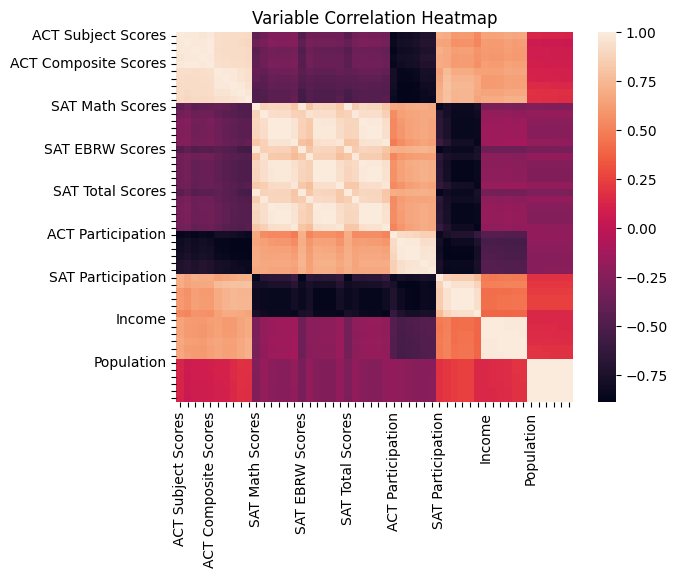

In [40]:
# Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.

# reorder the columns to give better visualization
better_sorting = (
    ["act_2017_math", "act_2017_science", "act_2017_reading", "act_2017_english"]
    + [f"act_{year}_composite" for year in range(2017, 2023)]
    + [f"sat_{year}_math" for year in range(2017, 2023)]
    + [f"sat_{year}_ebrw" for year in range(2017, 2023)]
    + [f"sat_{year}_total" for year in range(2017, 2023)]
    + [f"act_{year}_participation" for year in range(2017, 2023)]
    + [f"sat_{year}_participation" for year in range(2017, 2023)]
    + [
        f"income_{year}" if year != 2022 else "income_2022_projected"
        for year in range(2017, 2023)
    ]
    + [
        f"population_{year}" if year != 2022 else "population_2022_projected"
        for year in range(2017, 2023)
    ]
)
# creates many empty labels so that each real label corresponds to a block
labels = (
    ["ACT Subject Scores"]
    + 3 * [""]
    + ["ACT Composite Scores"]
    + 5 * [""]
    + ["SAT Math Scores"]
    + 5 * [""]
    + ["SAT EBRW Scores"]
    + 5 * [""]
    + ["SAT Total Scores"]
    + 5 * [""]
    + ["ACT Participation"]
    + 5 * [""]
    + ["SAT Participation"]
    + 5 * [""]
    + ["Income"]
    + 5 * [""]
    + ["Population"]
    + 5 * [""]
)
sns.heatmap(full_df[better_sorting].corr(), xticklabels=labels, yticklabels=labels)
plt.title("Variable Correlation Heatmap")
plt.savefig("../img/other/heatmap.png", bbox_inches="tight")

The above heatmap displays a few trends very clearly, namely:
* Testing rates and the corresponding scores are negatively correlated, while the opposing score is positively correlated. This reinforces my earlier suspicions about the effects of mandated testing on scores.
* Good ACT scores correlate negatively with good SAT scores, but with less magnitude than participation rates
* Income and population have a small positive correlation coefficient

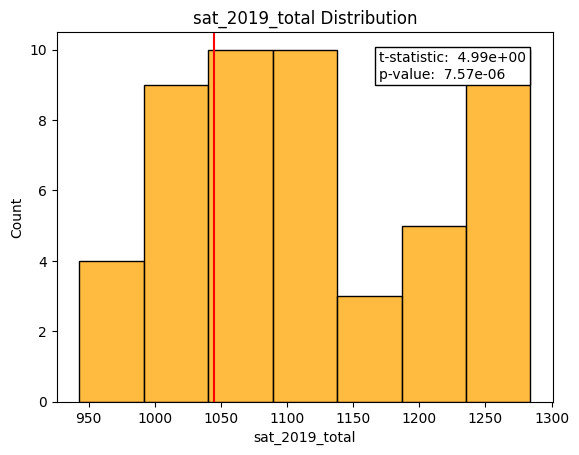

22/53 features were likely sampled from a normal distribution.


In [41]:
# create univariate histograms for ALL features
plt.ioff()  # prevent plots from showing in output

significance_threshold = 0.05
likely_normal_sampled = 0
total_cols = len(no_national_df.columns)
for col, values in no_national_df.items():
    if col != "state":
        savepath = f"../img/univariate/{col}"
        fig = plt.figure()
        ax = plt.subplot()
        expected_value = full_df[col][full_df["state"] == "National"].values
        t, p = stats.ttest_1samp(values, popmean=expected_value)  # get t and p values
        t, p = t[0], p[0]
        # color by statistical significance
        if p <= significance_threshold:
            sns.histplot(values, color="orange", ax=ax)
        else:
            sns.histplot(values, color="blue", ax=ax)
            likely_normal_sampled += 1
        text = f"t-statistic: {t: .2e}\np-value: {p: .2e}"
        box = dict(boxstyle="square", facecolor="white")
        # add ttest results to plot
        ax.text(0.65, 0.875, text, transform=ax.transAxes, bbox=box)
        y_min, y_max = ax.get_ylim()
        # plot national stat as a line
        plt.vlines(expected_value, color="red", ymin=y_min, ymax=2 * y_max)
        ax.set_ylim(ymin=y_min, ymax=y_max)
        ax.set_title(f"{col} Distribution")
        plt.savefig(savepath, bbox_inches="tight")
        if col == "sat_2019_total":
            plt.show()
        plt.close()

print(
    f"{likely_normal_sampled}/{total_cols} features were likely sampled from a normal distribution."
)

There are *far* too many feature involved in this analysis to print each image to the console and explain each one, so most images generated are saved to `img/univariate/` from the main directory. We output and analyze a single plot instead.

Two things should be pointed out first: one, the red vertical line represents the national average for the feature, in this case the total sat score in 2019, and two, the graph is orange, indicating that this feature was most likely not normally sampled. If it were, it would be colored blue. We note that the distribution exhibits no symmetry about the national average nor any other point on the x-axis. The bulk of the scores are located between (roughly) 1000 and 1150, but there is a spike in the 1250+ range. This indicates that there are many states with average performance on the SAT, as well as a relatively high number of states with much higher performance, but few in between. The single sample p-value for this distribution is $p=7.57 \times 10^{-6}$, indicating that given the national mean, the states scores are likely not normally distributed, but they shouldn't be. Each state has different education policy, funding available for schools, and culture surrounding education. The score values aren't drawn from identical distributions at all, let alone a single normal distribution. As such, only 22 features had *insignificant* p-values, most notably the income distributions, participation rate distributions, and the ACT 2017 subject score distributions. 

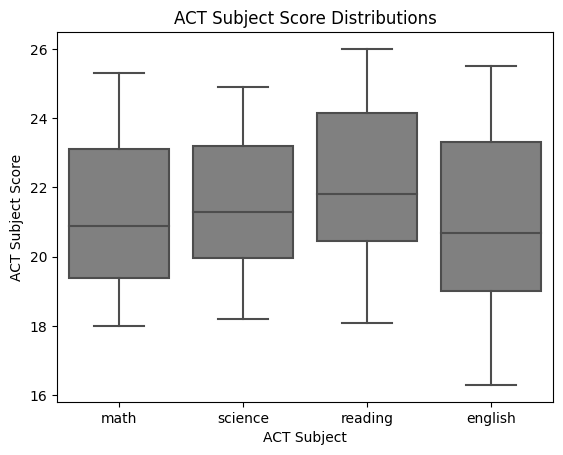

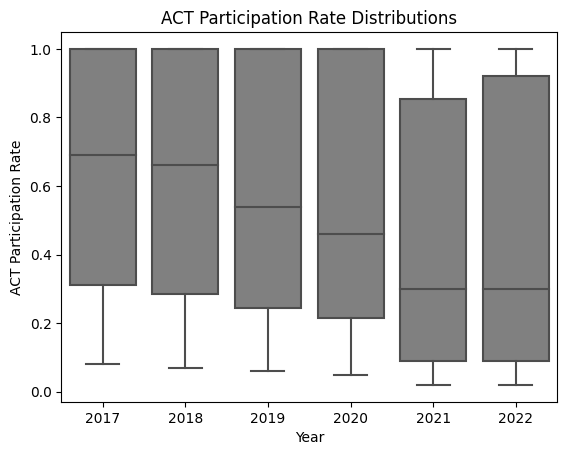

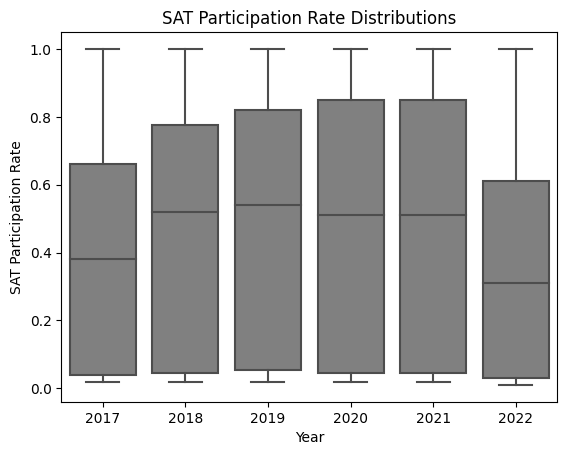

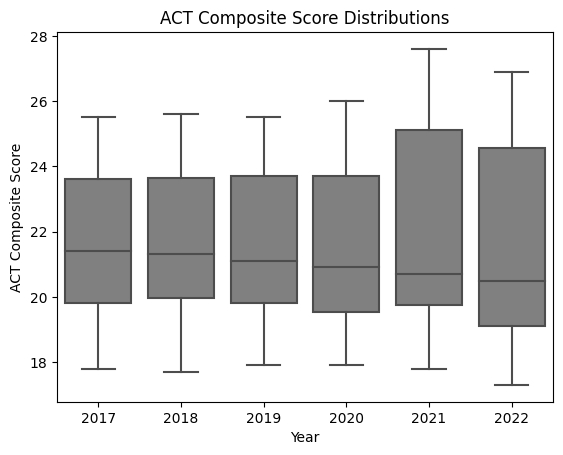

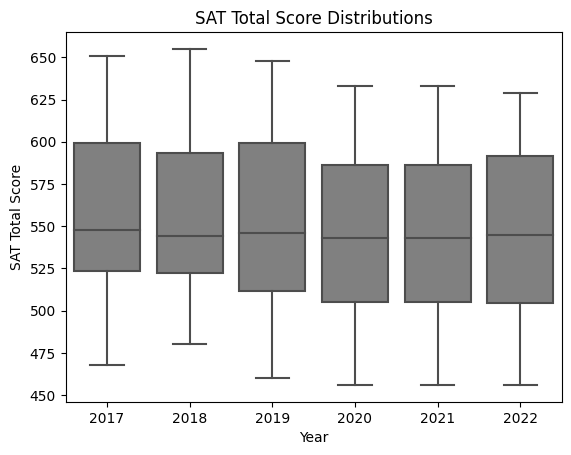

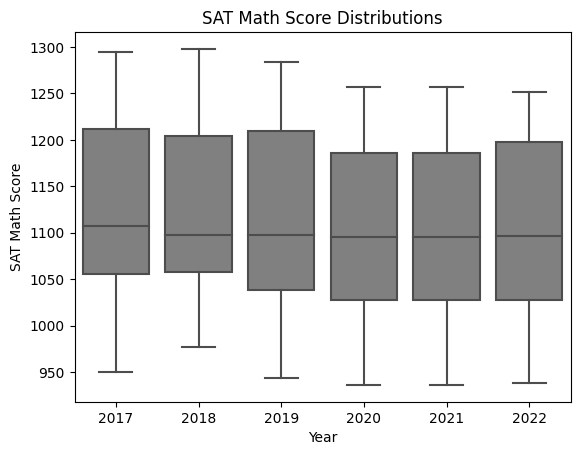

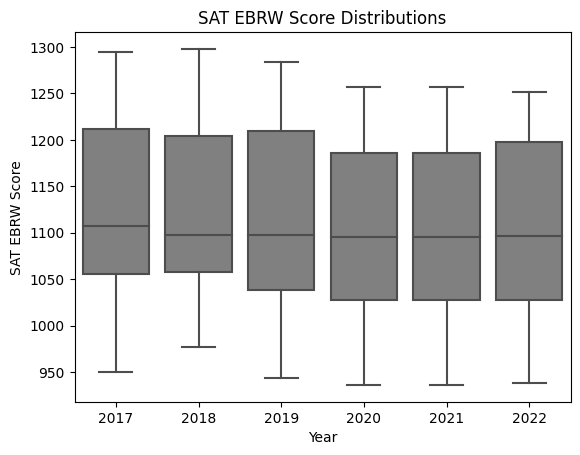

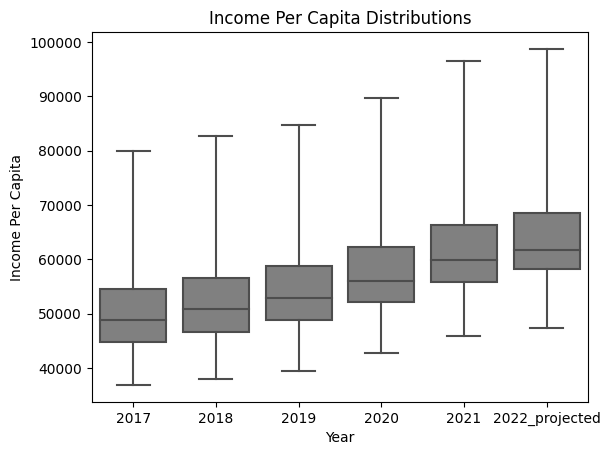

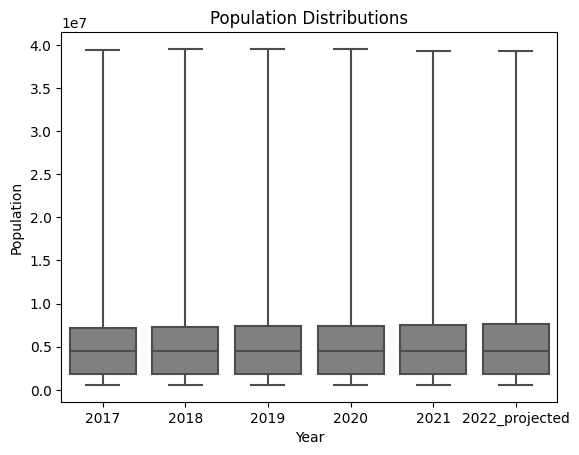

In [42]:
# create boxplots for all variable groups
plt.ion()  # show plots in output
years = range(2017, 2023)

# create blocks of similar variables
act_subject_block = [
    "act_2017_math",
    "act_2017_science",
    "act_2017_reading",
    "act_2017_english",
]
act_participation_block = [f"act_{year}_participation" for year in years]
act_score_block = [f"act_{year}_composite" for year in years]
sat_participation_block = [f"sat_{year}_participation" for year in years]
sat_score_block = [f"sat_{year}_total" for year in years]
sat_math_block = [f"sat_{year}_math" for year in years]
sat_ebrw_block = [f"sat_{year}_total" for year in years]
income_block = [
    f"income_{year}" if year != 2022 else "income_2022_projected" for year in years
]
population_block = [
    f"population_{year}" if year != 2022 else "population_2022_projected"
    for year in years
]

blocks = [
    act_subject_block,
    act_participation_block,
    sat_participation_block,
    act_score_block,
    sat_math_block,
    sat_ebrw_block,
    sat_score_block,
    income_block,
    population_block,
]

# create common labels for each block
block_labels = [
    "ACT Subject Score",
    "ACT Participation Rate",
    "SAT Participation Rate",
    "ACT Composite Score",
    "SAT Total Score",
    "SAT Math Score",
    "SAT EBRW Score",
    "Income Per Capita",
    "Population",
]

# make boxplots
for n, (b, l) in enumerate(zip(blocks, block_labels)):
    fig = plt.figure()
    ax = plt.subplot()
    ax = sns.boxplot(data=no_national_df[b], ax=ax, color="gray", whis=20)
    if n == 0:
        ax.set_xticklabels(["math", "science", "reading", "english"])
        ax.set_xlabel("ACT Subject")
    elif n == 7 or n == 8:
        ax.set_xticklabels(list(range(2017, 2022)) + ["2022_projected"])
        ax.set_xlabel("Year")
    else:
        ax.set_xticklabels(list(range(2017, 2023)))
        ax.set_xlabel("Year")

    ax.set_title(l + " Distributions")
    ax.set_ylabel(l)
    plt.savefig(
        "../img/boxplots/" + l.replace(" ", "_").lower() + ".png", bbox_inches="tight"
    )

In the above box plots, only two plots stick out as odd: population and income. This is due to a few outliers in those areas, most notably California, which is the state with the largest population and income. These outliers, while large, shouldn't have a large impact on the analysis, and they are relevant enough to be kept in the dataset. Population is a feature that is mostly only used for calculating other features for weighted averages, and the magnitude of the income outliers is nothing alarming.

In [43]:
# create scatter distributions for ALL bivariate pairs
# data is grouped together for similar features and color coded by year
def make_scatter_plots(df, x_cols, y_col, x_label, savepath):
    colors = sns.color_palette(n_colors=6)
    years = list(range(2017, 2023))
    color_year_pairs = {y: c for y, c in zip(years, colors)}
    subjects = ["math", "reading", "science", "english", "ebrw"]
    color_subject_pairs = {s: colors[i] for i, s in enumerate(subjects)}
    y = df[y_col].values
    y_words = y_col.split("_")
    x_words = [x_col.split("_") for x_col in x_cols]
    y_year = y_words[1]
    fig = plt.figure()
    ax = plt.subplot()
    for n, x_col in enumerate(x_cols):
        if x_col != y_col:
            x = df[x_col]
            x_year = x_words[n][1]
            is_act_subject = (
                any([subject in x_col for subject in subjects])
                and x_words[n][0] == "act"
            )
            if is_act_subject:
                color = color_subject_pairs[x_words[n][2]]
            else:
                color = color_year_pairs[int(x_year)]
            ax = sns.scatterplot(x=x, y=y, color=color, label=x_col, ax=ax)
            plt.ylabel(y_col)
            plt.xlabel(x_label)
            plt.title(f"{y_col} vs. {x_label}")

    plt.savefig(savepath, bbox_inches="tight")
    plt.close()


plt.ioff()  # prevent plots from showing in output
# make bivariate plots
for y_col in no_national_df.columns:
    if y_col != "state":
        path = f"../img/bivariate/{y_col}/"
        Path(path).mkdir(parents=True, exist_ok=True)
        for b, l in zip(blocks, block_labels):
            savepath = path + l.lower().replace(" ", "_")
            make_scatter_plots(no_national_df, b, y_col, l, savepath)

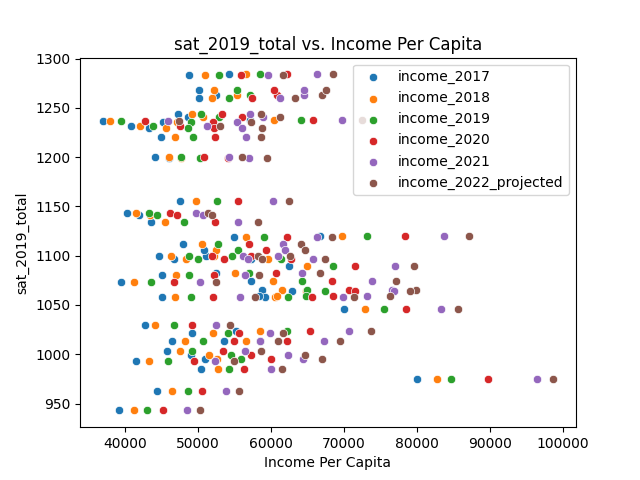

In [44]:
# note:
# some images were copied into a second directory for uploading and for the readme
# below is one such image from the above output set
Image(filename="../readme_img/sat_2019_total_vs_income_per_capita.png")

Like with the histograms, there are far too many bivariate relationships to display and explain, so I will analyze a single sample instead. Most of the graphs produced are highly pertinent to the analysis, with the possible exception of the relationships between population and the rest of the features. Still, these relationships aren't completely useless, so I opted to at least generate them. When this script is run, all images will be saved to `img/bivariate/<feature_name>/`, with the relevant feature on the y-axis. 

At a glance, we see that the scatter plot is color coded by year. All yearly features share the same colors for each year, being blue for 2017, orange for 2018 and so on. The exception to this rule are the ACT subject scores in 2017 which utilize the same colors. As for the data itself, the scatterplot is surprisingly ordered. Each year is more or less slightly shifted to the left from the previous year, with shifts along the y-axis being minor in comparison. There is no visually obvious correlations as plotted, however we know from the grouped participation rate analysis that there is some correlation. 

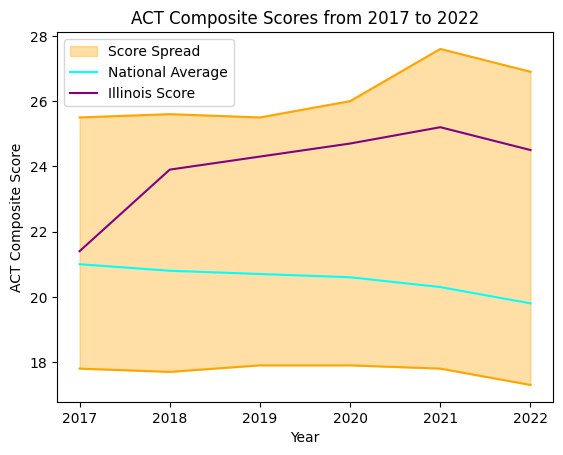

In [45]:
# create a plot showing trends of scores across the nation
# highlighting national and illinois performance
# ACT
plt.ion()  # display figure in output
fig = plt.figure()
act_score_cols = [f"act_{year}_composite" for year in range(2017, 2023)]
act_score_df = full_df[act_score_cols]
min_curve = act_score_df.min()
max_curve = act_score_df.max()
national_curve = act_score_df[full_df["state"] == "National"].values.flatten()
illinois_curve = act_score_df[full_df["state"] == "Illinois"].values.flatten()
# plot min and max values
# then fill between them
ax = sns.lineplot(min_curve, color="orange")
ax = sns.lineplot(max_curve, color="orange", ax=ax)
x_data = ax.lines[0].get_xdata()
ax = ax.fill_between(
    x_data, min_curve, max_curve, color="orange", alpha=0.35, label="Score Spread"
)
# plot national and state data
ax = sns.lineplot(x=x_data, y=national_curve, color="cyan", label="National Average")
ax = sns.lineplot(x=x_data, y=illinois_curve, color="purple", label="Illinois Score")
ax.set_xticks(x_data)
ax.set_xticklabels(list(range(2017, 2023)))
plt.xlabel("Year")
plt.ylabel("ACT Composite Score")
plt.title("ACT Composite Scores from 2017 to 2022")
plt.legend()
plt.savefig("../img/other/act_yearly.png", bbox_inches="tight")
plt.show()

A plot highlighting the national trend and the Illinois trend for ACT score data compared to the trends of the full dataset. The upper and lower orange lines represent the upper and lower bounds on the dataset and not any state in particularly. Illinois is mostly trending upwards during the duration, whereas the national average is trending down.

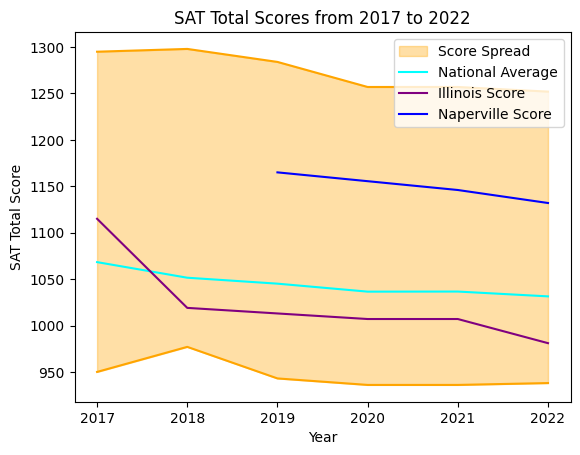

In [46]:
# SAT
fig = plt.figure()
sat_score_cols = [f"sat_{year}_total" for year in range(2017, 2023)]
sat_score_df = full_df[sat_score_cols]
min_curve = sat_score_df.min()
max_curve = sat_score_df.max()
national_curve = sat_score_df[full_df["state"] == "National"].values.flatten()
illinois_curve = sat_score_df[full_df["state"] == "Illinois"].values.flatten()
naperville_curve = naperville_df["sat_total"].values.flatten()
naperville_x = np.array([2, 4, 5])
# plot min and max values
# then fill between them
ax = sns.lineplot(min_curve, color="orange")
ax = sns.lineplot(max_curve, color="orange", ax=ax)
x_data = ax.lines[0].get_xdata()
ax = ax.fill_between(
    x_data, min_curve, max_curve, color="orange", alpha=0.35, label="Score Spread"
)
# plot national, state, and local data
ax = sns.lineplot(x=x_data, y=national_curve, color="cyan", label="National Average")
ax = sns.lineplot(x=x_data, y=illinois_curve, color="purple", label="Illinois Score")
ax = sns.lineplot(
    x=naperville_x, y=naperville_curve, color="blue", label="Naperville Score"
)
ax.set_xticks(x_data)
ax.set_xticklabels(list(range(2017, 2023)))
plt.xlabel("Year")
plt.ylabel("SAT Total Score")
plt.title("SAT Total Scores from 2017 to 2022")
plt.legend(loc=1)
plt.savefig("../img/other/sat_yearly.png", bbox_inches="tight")
plt.show()

The same plot as above, but for SAT data and incorporating the available local data. In this case, the national, Illinois, and Naperville averages are all trending down.

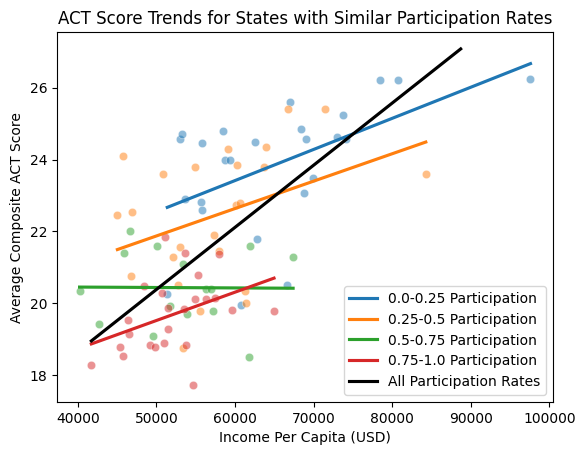

In [47]:
# plot scores vs income for states with similar testing rates
# ACT

# data is grouped by participation rate
# if a state is present on year
# its data is aggregated and that states count is incremented
# the aggregates are then divided by the counts and plotted
num_splits = 5
rates = np.linspace(0.0, 1.0, num_splits)
national_income_aggregate = pd.Series([], dtype=np.float64)
national_act_score_aggregate = pd.Series([], dtype=np.float64)
fig = plt.figure()
ax = plt.subplot()
for n in range(len(rates) - 1):
    lower = rates[n]
    upper = rates[n + 1]
    income_aggregate = pd.Series([], dtype=np.float64)
    act_score_aggregate = pd.Series([], dtype=np.float64)
    count_aggregate = pd.Series([], dtype=np.float64)
    for year in range(2017, 2023):
        participation_bracket = no_national_df[
            (no_national_df[f"act_{year}_participation"] > lower)
            & (no_national_df[f"act_{year}_participation"] <= upper)
        ]
        # increment scores
        act_score_aggregate = act_score_aggregate.add(
            participation_bracket[f"act_{year}_composite"], fill_value=0
        )
        national_act_score_aggregate = national_act_score_aggregate.add(
            participation_bracket[f"act_{year}_composite"], fill_value=0
        )
        # increment counts
        count_aggregate = count_aggregate.add(
            participation_bracket[f"act_{year}_composite"].astype(bool).astype(int),
            fill_value=0,
        )
        if year != 2022:
            income_aggregate = income_aggregate.add(
                participation_bracket[f"income_{year}"], fill_value=0
            )
            national_income_aggregate = national_income_aggregate.add(
                participation_bracket[f"income_{year}"], fill_value=0
            )
        else:
            income_aggregate = income_aggregate.add(
                participation_bracket[f"income_{year}_projected"], fill_value=0
            )
            national_income_aggregate = national_income_aggregate.add(
                participation_bracket[f"income_{year}_projected"], fill_value=0
            )
    # scale aggregates by counts
    income_aggregate /= count_aggregate
    income_aggregate = income_aggregate.values
    act_score_aggregate /= count_aggregate
    act_score_aggregate = act_score_aggregate.values
    # sort by increasing income
    sorter = np.argsort(income_aggregate)
    income_sorted = income_aggregate[sorter]
    act_score_sorted = act_score_aggregate[sorter]
    # plot best fit line
    ax = sns.regplot(
        x=income_sorted,
        y=act_score_sorted,
        label=f"{lower}-{upper} Participation",
        scatter=False,
        ci=None,
        ax=ax,
    )
    # plot points
    ax = sns.scatterplot(x=income_sorted, y=act_score_sorted, alpha=0.5)

# do the same, but with all data
national_income_aggregate = national_income_aggregate.values / 6.0
national_act_score_aggregate = national_act_score_aggregate / 6.0
sorter = np.argsort(national_income_aggregate)
national_income_sorted = national_income_aggregate[sorter]
national_act_score_sorted = national_act_score_aggregate[sorter]

sns.regplot(
    x=national_income_sorted,
    y=national_act_score_sorted,
    label="All Participation Rates",
    scatter=False,
    ci=None,
    color="black",
    ax=ax,
)

plt.xlabel("Income Per Capita (USD)")
plt.ylabel("Average Composite ACT Score")
plt.title("ACT Score Trends for States with Similar Participation Rates")
plt.legend()
plt.savefig("../img/other/act_trends.png", bbox_inches="tight")

A plot visualizing the relationship between income and ACT score when only groups with similar participation rates are compared. With the exception of the green group (participation rates between 50 and 75%), all subgroups exhibit positive correlation. We note here that the above plot was calculated slightly differently than above. Earlier, the average of the correlations year-to-year was calculated, giving four positive subpopulation correlations. Here, we calculated the correlation of the average income year-to-year, giving three positive correlations and one negative.

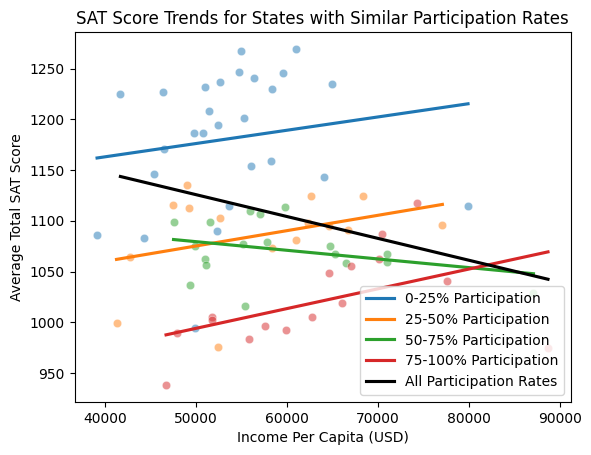

In [48]:
# SAT

# data is grouped by participation rate
# if a state is present on year
# its data is aggregated and that states count is incremented
# the aggregates are then divided by the counts and plotted
num_splits = 5
rates = np.linspace(0.0, 1.0, num_splits)
national_income_aggregate = pd.Series([], dtype=np.float64)
national_sat_score_aggregate = pd.Series([], dtype=np.float64)
fig = plt.figure()
ax = plt.subplot()
for n in range(len(rates) - 1):
    lower = rates[n]
    upper = rates[n + 1]
    income_aggregate = pd.Series([], dtype=np.float64)
    sat_score_aggregate = pd.Series([], dtype=np.float64)
    count_aggregate = pd.Series([], dtype=np.float64)
    for year in range(2017, 2023):
        participation_bracket = no_national_df[
            (no_national_df[f"sat_{year}_participation"] > lower)
            & (no_national_df[f"sat_{year}_participation"] <= upper)
        ]
        # increment scores
        sat_score_aggregate = sat_score_aggregate.add(
            participation_bracket[f"sat_{year}_total"], fill_value=0
        )
        national_sat_score_aggregate = national_sat_score_aggregate.add(
            participation_bracket[f"sat_{year}_total"], fill_value=0
        )
        # increment counts
        count_aggregate = count_aggregate.add(
            participation_bracket[f"sat_{year}_total"].astype(bool).astype(int),
            fill_value=0,
        )
        if year != 2022:
            income_aggregate = income_aggregate.add(
                participation_bracket[f"income_{year}"], fill_value=0
            )
            national_income_aggregate = national_income_aggregate.add(
                participation_bracket[f"income_{year}"], fill_value=0
            )
        else:
            income_aggregate = income_aggregate.add(
                participation_bracket[f"income_{year}_projected"], fill_value=0
            )
            national_income_aggregate = national_income_aggregate.add(
                participation_bracket[f"income_{year}_projected"], fill_value=0
            )
    # scale aggregates by counts
    income_aggregate /= count_aggregate
    income_aggregate = income_aggregate.values
    sat_score_aggregate /= count_aggregate
    sat_score_aggregate = sat_score_aggregate.values
    # sort by increasing income
    sorter = np.argsort(income_aggregate)
    income_sorted = income_aggregate[sorter]
    sat_score_sorted = sat_score_aggregate[sorter]
    # plot best fit line
    ax = sns.regplot(
        x=income_sorted,
        y=sat_score_sorted,
        label=f"{int(100 * lower)}-{int(100 * upper)}% Participation",
        scatter=False,
        ci=None,
        ax=ax,
    )
    # plot points
    ax = sns.scatterplot(x=income_sorted, y=sat_score_sorted, alpha=0.5)

# do the same, but with all data
national_income_aggregate = national_income_aggregate.values / 6.0
national_sat_score_aggregate = national_sat_score_aggregate / 6.0
sorter = np.argsort(national_income_aggregate)
national_income_sorted = national_income_aggregate[sorter]
national_sat_score_sorted = national_sat_score_aggregate[sorter]

sns.regplot(
    x=national_income_sorted,
    y=national_sat_score_sorted,
    label="All Participation Rates",
    scatter=False,
    ci=None,
    color="black",
    ax=ax,
)

plt.xlabel("Income Per Capita (USD)")
plt.ylabel("Average Total SAT Score")
plt.title("SAT Score Trends for States with Similar Participation Rates")
plt.legend()
plt.savefig("../img/other/sat_trends.png", bbox_inches="tight")

Same as the above plot, but for SAT data. Despite having a net downward trend, the positive relationship between income and score can be seen when states with similar testing policies are considered together. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

As a nation, students are performing worse on both the ACT and the SAT by the year. In the state of Illinois specifically, ACT scores are improving, but the more relevant SAT scores are worsening. The city of Naperville is doing well in comparison, by some metrics. Our SAT scores are considerably higher than the national average, but they too are decreasing. There is evidence in the data to show that mandated testing leads to worse performance on that same test, and in the state of Illinois this is shown by relatively high ACT scores, and very low SAT scores. Furthermore, increases in local wealth are correlated with better test scores. In light of this evidence, I propose three courses of action:

1. Switch back to the ACT as the primary test for Naperville. The ACT seems to show a strong relationship between wealth and test score, and as a wealthy city within a wealthy state, if this relationship is causal our students would likely see a great increase in their test scores. This, if nothing else, would improve their odds at a post-secondary education, which is another metric of success this study did not examine.

2. Stop mandating standardized tests. Higher rates of participation are associated with lower test scores. This study was not able to determine a reason why this is, but if there are other ways to measure a school's success they should be utilized more.

3. Bolster the local economy. Schools perform better with additional funding, but if that funding isn't available a similar result can be achieved by increasing the average wealth of the locals. This can be accomplished in a number of ways, such as increasing the minimum wage, or by attracting new businesses to the city. The effect of this would be two-fold: the schools could be given for funding from the increase in collected taxes, and students would have a higher quality of life and thus would perform better.

One and two are not mutually exclusive options, as the city of Naperville can recommend students take the ACT over the SAT without requiring it. I believe that any and all of these options have potential to improve student performance if implemented. Most of all, I strongly recommend a secondary analysis featuring more insight into national and state-level education policies, the effects of the COVID-19 pandemic on education, and more metrics of student success besides standardized tests.